With the increasing competition in SVOD streaming industry, Netflix is now plateauing in subscriber growth. We want to help Netflix to find out how Originals, both films and tv shows, are performing in terms of ratings and reviews, and determine which type of original content it should produce in order to maintain its position as the market market.

We plan to use the tools and skills we learnt in class and analyze the IMDb data of the Netflix Originals US market.

Here are the steps:

1. scrape all information of Netflix Originals TV shows and movies from IMDb website (including, titles, unique title id, year, ratings, number of reviews, genre) - Mark, Makena

2. get all top 25 reviews from IMDb website for all shows and movies - Jay

3. conduct sentimental analysis to to analyze the social reactions and give different insights about the production; create the full data table by merging the sentiment table with information table - Adia

4. plot graphs - Carin

5. build Flask - Victoria

!!! Note: Since it will take hours for the full result, we have stored everything in pickle files. You can just read through the first section as we have provided the sample results and run the pickle file to see the full results. (The codes are provided in the second section)

In [ ]:
#importing all the necessary libraries
import requests #gets the link 
from bs4 import BeautifulSoup #allows us to parse through link
import json #format 
import pandas as pd #dataframe
import re
import regex #regular expressions 
import pickle #we store all the list/dictionary in pickles so we don't need to run all the data everytime

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Netflix Originals **TV Shows**

In [ ]:
#the url that contains all Netflix Original TV Shows
#the same process can be used to obtain the Movies also
url = "https://www.imdb.com/list/ls093971121/?st_dt=&mode=detail&page=2&sort=list_order,asc"

In [ ]:
#request the url, then get the text version of it
resp = requests.get(url)
resp.text

#the html codes that will be processed by beautifulSoup
soup = BeautifulSoup(resp.text, "html")
soup

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="app-id=342792525, app-argument=imdb:///list/ls093971121?src=mdot" name="apple-itunes-app"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>All Netflix Originals - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.im

In [ ]:
#finding the list of dictionaries that contain the endpoints needed to reach the individual TV Shows
data = json.loads(soup.find('script', type="application/ld+json").text)

#finding the itemListElement or unique title code of "about"
url_segment_list = data["about"]['itemListElement']
url_segment_list

[{'@type': 'ListItem', 'position': '1', 'url': '/title/tt1856010/'},
 {'@type': 'ListItem', 'position': '2', 'url': '/title/tt2309295/'},
 {'@type': 'ListItem', 'position': '3', 'url': '/title/tt2372162/'},
 {'@type': 'ListItem', 'position': '4', 'url': '/title/tt2189461/'},
 {'@type': 'ListItem', 'position': '5', 'url': '/title/tt3520702/'},
 {'@type': 'ListItem', 'position': '6', 'url': '/title/tt3322312/'},
 {'@type': 'ListItem', 'position': '7', 'url': '/title/tt2431438/'},
 {'@type': 'ListItem', 'position': '8', 'url': '/title/tt2707408/'},
 {'@type': 'ListItem', 'position': '9', 'url': '/title/tt2357547/'},
 {'@type': 'ListItem', 'position': '10', 'url': '/title/tt4574334/'},
 {'@type': 'ListItem', 'position': '11', 'url': '/title/tt4592410/'},
 {'@type': 'ListItem', 'position': '12', 'url': '/title/tt3322314/'},
 {'@type': 'ListItem', 'position': '13', 'url': '/title/tt4786824/'},
 {'@type': 'ListItem', 'position': '14', 'url': '/title/tt5435008/'},
 {'@type': 'ListItem', 'posit

In [ ]:
#create a list of the endpoints in preparation of obtaining the individual url for each TV Shows
url_segments = []
for items in url_segment_list:
  url_segments.append(items["url"])

#obtaining the tconst string needed to access the reviews of each shows from the IMDb API
tt_codes = []
for segments in url_segments:
  tt_codes.append(segments.strip("/").strip("title").strip("/"))
  
tt_codes #Column 1 of the Dataframe for Shows

['tt1856010',
 'tt2309295',
 'tt2372162',
 'tt2189461',
 'tt3520702',
 'tt3322312',
 'tt2431438',
 'tt2707408',
 'tt2357547',
 'tt4574334',
 'tt4592410',
 'tt3322314',
 'tt4786824',
 'tt5435008',
 'tt4635282',
 'tt4834206',
 'tt3322310',
 'tt1837492',
 'tt6928052',
 'tt5503718',
 'tt5071412',
 'tt4230076',
 'tt5290382',
 'tt6076336',
 'tt5675620',
 'tt5516154',
 'tt2261227',
 'tt6297682',
 'tt5232792',
 'tt7692572',
 'tt8021824',
 'tt6763664',
 'tt7569592',
 'tt8714904',
 'tt6898970',
 'tt1312171',
 'tt8295472',
 'tt9817236',
 'tt8923854',
 'tt7949204',
 'tt8778064',
 'tt8860450',
 'tt7137906',
 'tt9134194',
 'tt8369840',
 'tt8652642',
 'tt6905542',
 'tt9067020',
 'tt7909970',
 'tt9348692',
 'tt7826108',
 'tt8509922',
 'tt7403736',
 'tt9077530',
 'tt7913450',
 'tt5180504',
 'tt7671598',
 'tt9117054',
 'tt8826128',
 'tt9698480',
 'tt3007572',
 'tt9426290',
 'tt8771910',
 'tt8403664',
 'tt8741648',
 'tt9815454',
 'tt10293938',
 'tt9827854',
 'tt7322210',
 'tt9073958',
 'tt9077540',
 'tt9

In [ ]:
datafile = open("tt_codes", "wb")

pickle.dump(tt_codes, datafile)

datafile.close()

In [ ]:
#creating the url for each TV Shows
shows_url = []

for segments in url_segments:
  full_url = "https://www.imdb.com" + segments + "?ref_=ttls_li_tt"
  shows_url.append(full_url)

shows_url

['https://www.imdb.com/title/tt1856010/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt2309295/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt2372162/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt2189461/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt3520702/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt3322312/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt2431438/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt2707408/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt2357547/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt4574334/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt4592410/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt3322314/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt4786824/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt5435008/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt4635282/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt4834206/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt3322310/?ref_=ttls_li_tt',
 'https://www.

In [ ]:
title_and_year_of_show = []

for link in shows_url:
  r = requests.get(link) #using requests to access each link
  soup = BeautifulSoup(r.text, "html") #using beautiful soup to turn text into html form
  title_and_year_of_show.append(soup.find("h1").text.strip()) #adding title element into list, strips new line

title_and_year_of_show   #Column 2 of Dataframe for shows, which will be title and year of each show

['House of Cards',
 'Hemlock Grove',
 'Orange Is the New Black',
 'Marco Polo',
 'Bloodline',
 'Daredevil',
 'Sense8',
 'Narcos',
 'Jessica Jones',
 'Stranger Things',
 'The Get Down',
 'Luke Cage',
 'The Crown',
 'Gilmore Girls: A Year in the Life',
 'The OA',
 'A Series of Unfortunate Events',
 'Iron Fist',
 '13 Reasons Why',
 'Free Rein',
 'Gypsy',
 'Ozark',
 'The Defenders',
 'Mindhunter',
 'Greenhouse Academy',
 'The Punisher',
 'Godless',
 'Altered Carbon',
 'Seven Seconds',
 'Lost in Space',
 'Ponysitters Club',
 'The Innocents',
 'The Haunting of Hill House',
 'Chilling Adventures of Sabrina',
 'Narcos: Mexico',
 'Tidelands',
 'The Umbrella Academy',
 'The Order',
 'Shadow',
 'Black Summer',
 'Chambers',
 'The Society',
 'What/If',
 'When They See Us',
 'Trinkets',
 'Another Life',
 'Wu Assassins',
 'The Dark Crystal: Age of Resistance',
 'The I-Land',
 'Unbelievable',
 'Criminal: UK',
 'Raising Dion',
 "Dolly Parton's Heartstrings",
 'V-Wars',
 'Virgin River',
 'Soundtrack',
 

In [ ]:
datafile = open("title_and_year_of_show", "wb")

pickle.dump(title_and_year_of_show, datafile)

datafile.close()

In [ ]:
#an example to show how we get years of the shows
years_tv_shows = []
temp_store = []
# <span class="lister-item-year text-muted unbold">(2014–2016)</span>

for link in shows_url:
  r = requests.get(link)  
  soup = BeautifulSoup(r.text, "html")
  for result in soup.find("div", class_ = "subtext").find_all("a"): 
    temp_store.append(result.text.strip().split(',')) 
  while len(temp_store) >= 3: 
    temp_store.pop(1)
  if 'TV Series' not in temp_store[-1][0]: 
    years_tv_shows.append("N/A") 
  if 'TV Series' in temp_store[-1][0]:            
     years_tv_shows.append(temp_store[-1][0][11:15])
    
  temp_store = []

years_tv_shows

['1982']

In [ ]:
#an example of how we get the genre each tv show
genre_of_shows = [] 
temp_store = []
# url_abc = "https://www.imdb.com/title/tt6877772/?ref_=ttls_li_tt"
# r_abc = requests.get(url_abc)
# soup_abc = BeautifulSoup(r_abc.text, "html")

for link in shows_url:
  r_2 = requests.get(link)
  soup_2 = BeautifulSoup(r_2.text, "html")
  for result in soup_2.find("div", class_ = "subtext").find_all("a"): 
    temp_store.append(result.text.strip())
  
  genre_of_shows.append(temp_store[0]) #getting only the first listed genre
  temp_store = []
  
# temp_store

genre_of_shows #Column 4 of Dataframe for shows, which is just the first listed genre of each show

['Drama']

In [ ]:
ratings_of_shows = []   #getting IMDb rating of each tv show

for link in shows_url:
  r = requests.get(link)
  soup = BeautifulSoup(r.text, "html")
  check = soup.find("span", itemprop="ratingValue")
  if check == None: 
    ratings_of_shows.append("N/A") #if no rating, there put N/A
  if check != None:
    ratings_of_shows.append(check.text.strip())

ratings_of_shows #Column 5 of Dataframe for shows, which is the IMDb rating for each show

In [ ]:
number_of_reviews_of_shows = [] #getting number of reviews for each tv show

for link in shows_url:
  r = requests.get(link)
  soup = BeautifulSoup(r.text, "html")
  check_2 = soup.find("span", itemprop="ratingCount")
  if check_2 == None: 
    number_of_reviews_of_shows.append("N/A") #if not # of reviews then put N/A
  if check_2 != None:
    number_of_reviews_of_shows.append(check_2.text.strip())

number_of_reviews_of_shows #Column 6 of Dataframe for shows

In [ ]:
columns = {'Title_id': tt_codes, 'Title': title_and_year_of_show, 'Year_released': years_tv_shows, 'Genre': genre_of_shows, '#_of_reviews': number_of_reviews_of_shows,'IMDb Grade': ratings_of_shows}

netflix_tv_shows = pd.DataFrame(data=columns)
netflix_tv_shows = netflix_tv_shows.sort_values(by=['IMDb Grade'],ascending=False)
netflix_tv_shows

#creating a dataframe from highest to lowest IMBd rating/grade

### NETFLIX ORIGINAL **MOVIES**

We will repeat the same thing as Netflix TV shows

In [ ]:
url_movies = "https://www.imdb.com/list/ls093350982/?sort=list_order,asc"   #Url for movies
resp_movies = requests.get(url_movies) 
resp_movies.text

In [ ]:
soup_movies = BeautifulSoup(resp_movies.text, "html")
data_movies = json.loads(soup_movies.find('script', type="application/ld+json").text)

url_segment_list_movies = data_movies["about"]['itemListElement']
url_segments_movies = []
for items in url_segment_list_movies:
  url_segments_movies.append(items["url"])

In [ ]:
tt_codes_movies = []
for segments in url_segments_movies:
  tt_codes_movies.append(segments.strip("/").strip("title").strip("/"))

tt_codes_movies

['tt1365050',
 'tt2479478',
 'tt2652118',
 'tt0837156',
 'tt4181052',
 'tt4769836',
 'tt2452386',
 'tt5240748',
 'tt4902716',
 'tt1639084',
 'tt1754656',
 'tt4855748',
 'tt5640450',
 'tt3922798',
 'tt4936176',
 'tt5059406',
 'tt5517438',
 'tt1542768',
 'tt5710042',
 'tt2106651',
 'tt5477566',
 'tt4981636',
 'tt5740806',
 'tt5577742',
 'tt5792472',
 'tt3171832',
 'tt3331028',
 'tt2962984',
 'tt5710514',
 'tt5826432',
 'tt4144332',
 'tt4842646',
 'tt5155780',
 'tt3155328',
 'tt5893332',
 'tt2582576',
 'tt4991512',
 'tt5717492',
 'tt3174376',
 'tt5809020',
 'tt4799064',
 'tt6574146',
 'tt4758646',
 'tt1386691',
 'tt5539054',
 'tt3967856',
 'tt5541240',
 'tt5990342',
 'tt1712192',
 'tt6048930',
 'tt1536537',
 'tt1241317',
 'tt2937366',
 'tt6119504',
 'tt4882376',
 'tt3748172',
 'tt5034266',
 'tt6895746',
 'tt4225622',
 'tt5536736',
 'tt6214928',
 'tt5723286',
 'tt5379294',
 'tt7608418',
 'tt2396589',
 'tt3255590',
 'tt7608534',
 'tt5519340',
 'tt5539052',
 'tt5267472',
 'tt7608028',
 'tt24

In [ ]:
#creating the url for each movie
movies_url = []

for segments in url_segments_movies:
  full_url_movies = "https://www.imdb.com" + segments + "?ref_=ttls_li_tt"
  movies_url.append(full_url_movies)

movies_url

['https://www.imdb.com/title/tt1365050/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt2479478/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt2652118/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt0837156/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt4181052/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt4769836/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt2452386/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt5240748/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt4902716/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt1639084/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt1754656/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt4855748/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt5640450/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt3922798/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt4936176/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt5059406/?ref_=ttls_li_tt',
 'https://www.imdb.com/title/tt5517438/?ref_=ttls_li_tt',
 'https://www.

In [ ]:
title_and_year_of_movie = []

for link in movies_url:
  r = requests.get(link)
  soup = BeautifulSoup(r.text, "html")
  title_and_year_of_movie.append(soup.find("h1").text.strip())

title_and_year_of_movie

['Beasts of No Nation\xa0(2015)',
 'The Ridiculous 6\xa0(2015)',
 'Crouching Tiger, Hidden Dragon: Sword of Destiny\xa0(2016)',
 "Pee-wee's Big Holiday\xa0(2016)",
 'Special Correspondents\xa0(2016)',
 'The Do-Over\xa0(2016)',
 'The Fundamentals of Caring\xa0(2016)',
 'Brahman Naman\xa0(2016)',
 'Rebirth\xa0(2016)',
 'Tallulah\xa0(2016)',
 'The Little Prince\xa0(2015)',
 'XOXO\xa0(2016)',
 'ARQ\xa0(2016)',
 'The Siege of Jadotville\xa0(2016)',
 'Mascots\xa0(2016)',
 'I Am the Pretty Thing That Lives in the House\xa0(2016)',
 '7 años\xa0(2016)',
 'True Memoirs of an International Assassin\xa0(2016)',
 'Mercy\xa0(2016)',
 'Spectral\xa0(2016)',
 'Barry\xa0(2016)',
 'Middle School: The Worst Years of My Life\xa0(2016)',
 'Coin Heist\xa0(2017)',
 'Clinical\xa0(2017)',
 'Take the 10\xa0(2017)',
 'iBoy\xa0(2017)',
 'Imperial Dreams\xa0(2014)',
 "Girlfriend's Day\xa0(2017)",
 "I Don't Feel at Home in This World Anymore.\xa0(2017)",
 'Burning Sands\xa0(2017)',
 'Deidra & Laney Rob a Train\xa0(2

In [ ]:
TextString1 = str(title_and_year_of_movie)

regex = re.compile(r'.*[\\]')

matches = regex.finditer(TextString1)

just_movie_title = []

for title in matches:
  just_movie_title.append(title.group())

just_movie_title

['[\'Beasts of No Nation\\xa0(2015)\', \'The Ridiculous 6\\xa0(2015)\', \'Crouching Tiger, Hidden Dragon: Sword of Destiny\\xa0(2016)\', "Pee-wee\'s Big Holiday\\xa0(2016)", \'Special Correspondents\\xa0(2016)\', \'The Do-Over\\xa0(2016)\', \'The Fundamentals of Caring\\xa0(2016)\', \'Brahman Naman\\xa0(2016)\', \'Rebirth\\xa0(2016)\', \'Tallulah\\xa0(2016)\', \'The Little Prince\\xa0(2015)\', \'XOXO\\xa0(2016)\', \'ARQ\\xa0(2016)\', \'The Siege of Jadotville\\xa0(2016)\', \'Mascots\\xa0(2016)\', \'I Am the Pretty Thing That Lives in the House\\xa0(2016)\', \'7 años\\xa0(2016)\', \'True Memoirs of an International Assassin\\xa0(2016)\', \'Mercy\\xa0(2016)\', \'Spectral\\xa0(2016)\', \'Barry\\xa0(2016)\', \'Middle School: The Worst Years of My Life\\xa0(2016)\', \'Coin Heist\\xa0(2017)\', \'Clinical\\xa0(2017)\', \'Take the 10\\xa0(2017)\', \'iBoy\\xa0(2017)\', \'Imperial Dreams\\xa0(2014)\', "Girlfriend\'s Day\\xa0(2017)", "I Don\'t Feel at Home in This World Anymore.\\xa0(2017)", \'Bu

In [ ]:
years_movies = []
temp_store_2 = []
# <span class="lister-item-year text-muted unbold">(2014–2016)</span>

for link in movies_url:
  r_2 = requests.get(url)  
  soup = BeautifulSoup(r_2.text, "html")
  for result in soup.find("div", class_ = "subtext").find_all("a"): 
    temp_store_2.append(result.text.strip().split(',')) 
  while len(temp_store_2) >= 3: 
    temp_store_2.pop(1)
  if len(temp_store_2[-1][0]) < 18: 
    years_movies.append("N/A") 
  if len(temp_store_2[-1][0]) > 18:         
    years_movies.append(temp_store_2[-1][0]) 
          
  temp_store_2 = []

years_movies

[['Drama'], ['War'], ['16 October 2015 (USA)']]


['N/A']

In [ ]:
genre_of_movies = []
temp_store_movies = []

for link in movies_url:
  r_2 = requests.get(link)
  soup_2 = BeautifulSoup(r_2.text, "html")

  for result in soup_2.find("div", class_ = "subtext").find_all("a"): 
    temp_store_movies.append(result.text.strip())
    
  genre_of_movies.append(temp_store_movies[0])
  temp_store_movies = []

# temp_store_movies

print(genre_of_movies)  #Column 4 

['Drama', 'Action', 'Action', 'Comedy', 'Comedy', 'Action', 'Comedy', 'Comedy', 'Thriller', 'Comedy', 'Animation', 'Drama', 'Action', 'Action', 'Comedy', 'Drama', 'Drama', 'Action', 'Drama', 'Action', 'Biography', 'Comedy', 'Crime', 'Horror', 'Comedy', 'Action', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Comedy', 'Biography', 'Drama', 'Comedy', 'Comedy', 'Action', 'Comedy', 'Crime', 'Drama', 'Comedy', 'Comedy', 'Animation', 'Comedy', 'Crime', 'Crime', 'Action', 'Drama', 'Comedy', 'Action', 'Comedy', 'Action', 'Action', 'Comedy', 'Comedy', 'Biography', 'Drama', 'Drama', 'Comedy', 'Comedy', 'Comedy', 'Crime', 'Action', 'Action', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Action', 'Biography', 'Comedy', 'Horror', 'Comedy', 'Biography', 'Action', 'Comedy', 'Horror', 'Comedy', 'Biography', 'Comedy', 'Mystery', 'Action', 'Adventure', 'Crime', 'Action', 'Fantasy', 'Biography', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Biography', 'Comedy', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Drama'

In [ ]:
ratings_of_movies = []   

for link in movies_url:
  r = requests.get(link)
  soup = BeautifulSoup(r.text, "html")
  check = soup.find("span", itemprop="ratingValue")
  if check == None: 
    ratings_of_movies.append("N/A")
  if check != None:
    ratings_of_movies.append(check.text.strip())

ratings_of_movies

['7.7',
 '4.8',
 '6.1',
 '6.1',
 '5.8',
 '5.7',
 '7.3',
 '5.6',
 '5.0',
 '6.7',
 '7.7',
 '5.3',
 '6.4',
 '7.2',
 '5.7',
 '4.5',
 '6.8',
 '5.9',
 '4.2',
 '6.3',
 '5.8',
 '6.1',
 '4.8',
 '5.1',
 '4.7',
 '6.0',
 '6.7',
 '5.2',
 '6.9',
 '6.0',
 '6.1',
 '6.1',
 '6.3',
 '6.2',
 '5.2',
 '6.3',
 '6.5',
 '5.8',
 '6.2',
 '5.2',
 '6.3',
 '6.7',
 '6.0',
 '6.3',
 '4.6',
 '7.3',
 '6.8',
 '6.5',
 '6.4',
 '5.4',
 '6.9',
 '4.5',
 '5.7',
 '5.2',
 '7.2',
 '6.6',
 '6.9',
 '5.6',
 '6.3',
 '6.9',
 '6.3',
 '6.4',
 '6.0',
 '5.8',
 '7.4',
 '5.7',
 '5.7',
 '6.3',
 '5.9',
 '5.4',
 '3.2',
 '5.5',
 '6.8',
 '5.5',
 '6.4',
 '6.3',
 '7.2',
 '6.9',
 '6.4',
 '5.4',
 '6.3',
 '6.8',
 '6.3',
 '5.4',
 '3.9',
 '6.2',
 '5.7',
 '6.4',
 '4.8',
 '5.8',
 '5.9',
 '6.0',
 '6.3',
 '5.1',
 '6.8',
 '5.8',
 '5.2',
 '7.2',
 '6.0',
 '6.1',
 '6.0',
 '6.3',
 '5.6',
 '5.2',
 '6.3',
 '6.5',
 '6.5',
 '5.7',
 '6.6',
 '5.3',
 '6.8',
 '5.8',
 '5.5',
 '5.0',
 '5.2',
 '5.8',
 '6.8',
 '6.1',
 '5.5',
 '7.4',
 '7.1',
 '5.8',
 '5.8',
 '5.3',
 '6.6',


In [ ]:
number_of_reviews_of_movies = [] 

for link in movies_url:
  r = requests.get(link)
  soup = BeautifulSoup(r.text, "html")
  check = soup.find("span", itemprop="ratingCount")
  if check == None: 
    number_of_reviews_of_movies.append("N/A")
  if check != None:
    number_of_reviews_of_movies.append(check.text.strip())

# number_of_reviews_of_movies

Since it takes hours to run out the result, we will store all the lists and data in pickle files. Now, we will start to do second part, sentimental analysis of the reviews.

### **Sentiment Analysis** of the reviews

In [ ]:
#from each TV show pages, the url that leads to the user reviews is extracted into a list
TV_review_page_link_list = []

for links in shows_url:
  show_page = requests.get(links)
  soup = BeautifulSoup(show_page.text, "html")

  a_list = soup.find_all("a")

  review_page_link_segment = " "

  for a in a_list:
    if "USER REVIEWS" in a.text:
      review_page_link_segment = a.get("href")

  review_page_link = "https://www.imdb.com" + review_page_link_segment
  TV_review_page_link_list.append(review_page_link)

In [ ]:
#25 of the most helpful user reviews(determined by IMDb) for each movies are extracted and stored into a dictionary where the keys are the unique codes to 
#each TV shows and the values are a list of 25 reviews.
dict_of_lists_of_reviews_TV = {}

for links in TV_review_page_link_list:
  reviews_page = requests.get(links)
  soup_review= BeautifulSoup(reviews_page.text, "html")

  list_reviews = soup_review.find_all("div", class_ = "text show-more__control")

  list_reviews_text= []

  for n, review_html in enumerate(list_reviews):
    if n <= 24:
      list_reviews_text.append(review_html.text)

  link_stripped = links.strip("https://www.imdb.com").strip("/reviews").strip("le/")

  dict_of_lists_of_reviews_TV[link_stripped] = list_reviews_text

In [ ]:
#from each movie pages, the url that leads to the user reviews is extracted into a list
movies_review_page_link_list = []

for links in movies_url:
  show_page = requests.get(links)
  soup = BeautifulSoup(show_page.text, "html")

  a_list = soup.find_all("a")

  review_page_link_segment = " "

  for a in a_list:
    if "USER REVIEW" in a.text:
      review_page_link_segment = a.get("href")

  review_page_link = "https://www.imdb.com" + review_page_link_segment
  movies_review_page_link_list.append(review_page_link)

In [ ]:
#25 of the most helpful user reviews(determined by IMDb) for each movies are extracted and stored into a dictionary where the keys are the unique codes to 
#each movies and the values are a list of 25 reviews.
dict_of_lists_of_reviews_movies = {}

for links in movies_review_page_link_list:
  reviews_page = requests.get(links)
  soup_review= BeautifulSoup(reviews_page.text, "html")

  list_reviews = soup_review.find_all("div", class_ = "text show-more__control")

  list_reviews_text= []

  for n, review_html in enumerate(list_reviews):
    if n <= 24:
      list_reviews_text.append(review_html.text)

  links_stripped = links.strip("https://www.imdb.com").strip("/reviews").strip("le/")

  dict_of_lists_of_reviews_movies[links_stripped] = list_reviews_text

In [ ]:
datafile_m = open("dict_of_lists_of_reviews_movies.pickled", "rb")
dict_of_lists_of_reviews_movies = pickle.load(datafile_m)

datafile_t = open("dict_of_lists_of_reviews_TV.pickled", "rb")
dict_of_lists_of_reviews_TV = pickle.load(datafile_t)

In [ ]:
#convert the reviews and titles into list so they are easier to loop
movie_reviews = list(dict_of_lists_of_reviews_movies.values())
movie_titles = list(dict_of_lists_of_reviews_movies.keys())
tv_reviews = list(dict_of_lists_of_reviews_TV.values())
tv_titles = list(dict_of_lists_of_reviews_TV.keys())

We want to do a sentiment analysis on the reviews so we can get an idea of the social media reaction and more accurate opinion from the viewers.

First, use command to install VADER Sentiment Analysis. "pip install vadersentiment"

Vader is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It can be efficient to tell us how positive and negative each review is and give a compound score, in which we can use to generate a label and a score for each of the movie/show.

In [ ]:
#import the sentiment analysis package
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
#we will get a result like this {'compound': -0.969, 'neg': 0.17, 'neu': 0.695, 'pos': 0.136}
#for each line of review, we will loop through the top 25 reviews for each movie
#and get each compound score from the sentiment analysis
list_of_mean_comp_score_movies = []
list_of_mean_inten_score_movies = []

for reviews_list in movie_reviews:
  if len(reviews_list) > 0:
    rev_score_list_comp = []
    rev_score_list_inten = []
    for rev in reviews_list:
      rev_score_comp = sid.polarity_scores(rev)["compound"] 
      rev_score_list_comp.append(rev_score_comp)

      #we also want to get an intensity score by adding up
      #the absolute value of negative score to the positive score
      #which will give us insights into how strongly people react to the movies
      rev_score_pos = sid.polarity_scores(rev)["pos"]
      rev_score_neg = sid.polarity_scores(rev)["neg"]
      rev_score_neg = abs(rev_score_neg)
      rev_score_intensity = rev_score_pos + rev_score_neg
      rev_score_list_inten.append(rev_score_intensity)
      
    #after scoring the compound score into a list, we want to get the average
    mean_score_comp = sum(rev_score_list_comp) / len(reviews_list)
    mean_score_inten = sum(rev_score_list_inten) / len(reviews_list)
    list_of_mean_comp_score_movies.append(mean_score_comp)
    list_of_mean_inten_score_movies.append(mean_score_inten)

  #we found that some of the scores do not have reviews and we will skip those
  else:
    list_of_mean_comp_score_movies.append("N/A")
    list_of_mean_inten_score_movies.append("N/A")


#we also want the list of compound score to look pretty by making them to 2 decimal places
formatted_list_of_mean_comp_score_movies = []
formatted_list_of_mean_intern_score_movies = []

for elem in list_of_mean_comp_score_movies:
  if elem != "N/A":
    formatted = '%.2f' % elem 
    formatted_list_of_mean_comp_score_movies.append(formatted)
  else:
    formatted_list_of_mean_comp_score_movies.append(elem)

for elem in list_of_mean_inten_score_movies:
  if elem != "N/A":
    formatted = '%.2f' % elem 
    formatted_list_of_mean_intern_score_movies.append(formatted)
  else:
    formatted_list_of_mean_intern_score_movies.append(elem)

#now we have a list of compound scores for each movies
#which this will give us more information about the reviews and social reaction

In [ ]:
#zip them into a dictionary with tt codes as the key
#and compound score & intensity score as the values
movie_sentiment_score_dict = {i:[j, k] for i, j, k in zip(movie_titles, formatted_list_of_mean_comp_score_movies, formatted_list_of_mean_intern_score_movies)}

In [ ]:
#store the dictionary to a pickle file
datafile = open("movie_sentiment_score_dict.pickled", "wb")
pickle.dump(movie_sentiment_score_dict, datafile)
datafile.close()

In [ ]:
#we will do the same for tv shows
#to get a compound score to analyze the reviews and the social attitude for the tv
list_of_mean_comp_score_tv = []
list_of_mean_inten_score_tv = []

for reviews_list in tv_reviews:
  if len(reviews_list) > 0:
    rev_score_list_comp = []
    rev_score_list_inten = []
    for rev in reviews_list:
      rev_score_comp = sid.polarity_scores(rev)["compound"] 
      rev_score_list_comp.append(rev_score_comp)

      rev_score_pos = sid.polarity_scores(rev)["pos"]
      rev_score_neg = sid.polarity_scores(rev)["neg"]
      rev_score_neg = abs(rev_score_neg)
      rev_score_intensity = rev_score_pos + rev_score_neg
      rev_score_list_inten.append(rev_score_intensity)

    mean_score_comp = sum(rev_score_list_comp) / len(reviews_list)
    mean_score_inten = sum(rev_score_list_inten) / len(reviews_list)
    list_of_mean_comp_score_tv.append(mean_score_comp)
    list_of_mean_inten_score_tv.append(mean_score_inten)

  else:
    list_of_mean_comp_score_tv.append("N/A")
    list_of_mean_inten_score_tv.append("N/A")


formatted_list_of_mean_comp_score_tv = []
formatted_list_of_mean_intern_score_tv = []

for elem in list_of_mean_comp_score_tv:
  if elem != "N/A":
    formatted = '%.2f' % elem 
    formatted_list_of_mean_comp_score_tv.append(formatted)
  else:
    formatted_list_of_mean_comp_score_tv.append(elem)

for elem in list_of_mean_inten_score_tv:
  if elem != "N/A":
    formatted = '%.2f' % elem 
    formatted_list_of_mean_intern_score_tv.append(formatted)
  else:
    formatted_list_of_mean_intern_score_tv.append(elem)

In [ ]:
#zip into a dictionary
tv_sentiment_score_dict = {i:[j, k] for i, j, k in zip(tv_titles, formatted_list_of_mean_comp_score_tv, formatted_list_of_mean_intern_score_tv)}
tv_sentiment_score_dict

#store in a pickle file
datafile = open("tv_sentiment_score_dict.pickled", "wb")
pickle.dump(tv_sentiment_score_dict, datafile)
datafile.close()

In [ ]:
#show the completed sentiment analysis in a dataframe table
#now this is ready to merge with the big table
import pandas as pd
movie_sentiment = pd.DataFrame.from_dict(movie_sentiment_score_dict, orient='index', columns=['compound','intensity'])
tv_sentiment = pd.DataFrame.from_dict(tv_sentiment_score_dict, orient='index', columns=['compound','intensity'])
tv_sentiment

compound intensity
tt1856010      0.05      0.25
tt2309295      0.14      0.24
tt2372162     -0.01      0.26
tt2189461      0.62      0.25
tt3520702      0.09      0.23
...             ...       ...
tt8741182      0.79      0.47
tt11332750     0.58      0.35
tt11768948     0.13      0.32
tt13262150     0.72      0.26
tt13433082     0.21      0.36

[1554 rows x 2 columns]

In [ ]:
#unzip the pickle files and load them as data to build the full table
!unzip pickles.zip

datafile1 = open("/content/pickles/tt codes/tt_codes_TV.pickled", "rb")
tt_codes = pickle.load(datafile1)

datafile2 = open("/content/pickles/title and years/title_and_year_of_show.pickled", "rb")
title_and_year_of_show = pickle.load(datafile2)

datafile3 = open("/content/pickles/TV---years, genre,ratings, num of reviews, rev score/years_tv_shows.pickled", "rb")
years_tv_shows = pickle.load(datafile3)

datafile4 = open("/content/pickles/TV---years, genre,ratings, num of reviews, rev score/genre_of_shows.pickled", "rb")
genre_of_shows = pickle.load(datafile4)

datafile5 = open("/content/pickles/TV---years, genre,ratings, num of reviews, rev score/number_of_reviews_of_shows.pickled", "rb")
number_of_reviews_of_shows = pickle.load(datafile5)

datafile6 = open("/content/pickles/TV---years, genre,ratings, num of reviews, rev score/ratings_of_shows.pickled", "rb")
ratings_of_shows = pickle.load(datafile6)

datafile7 = open("/content/pickles/TV---years, genre,ratings, num of reviews, rev score/tv_sentiment_score_dict.pickled", "rb") 
tv_sentiment_score_dict = pickle.load(datafile7)

Archive:  pickles.zip
replace __MACOSX/._pickles? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/._pickles      
  inflating: __MACOSX/pickles/._Movies---years, titles, genre,ratings, num of reviews, rev score  
  inflating: __MACOSX/pickles/._review page link lists  
  inflating: __MACOSX/pickles/._dict of lists of reviews  
  inflating: __MACOSX/pickles/._tt codes  
  inflating: __MACOSX/pickles/._title and years  
  inflating: __MACOSX/pickles/._TV---years, genre,ratings, num of reviews, rev score  
  inflating: pickles/Movies---years, titles, genre,ratings, num of reviews, rev score/.DS_Store  
  inflating: __MACOSX/pickles/Movies---years, titles, genre,ratings, num of reviews, rev score/._.DS_Store  
  inflating: pickles/Movies---years, titles, genre,ratings, num of reviews, rev score/just_movie_year.pikled  
  inflating: __MACOSX/pickles/Movies---years, titles, genre,ratings, num of reviews, rev score/._just_movie_year.pikled  
  inflating: pickles/Movies---years, 

In [ ]:
#merge the sentiment table with the large datafram
columns = {'Title_id': tt_codes, 'Title': title_and_year_of_show, 'Year_released': years_tv_shows, 'Genre': genre_of_shows, '#_of_reviews': number_of_reviews_of_shows,'IMDb Grade': ratings_of_shows}
Sentiment_Score, Intensity_Score = zip(*tv_sentiment_score_dict.values())
columns_sentiment = {'Title_id': tv_sentiment_score_dict.keys(), 'Sentiment_Score': Sentiment_Score, 'Intensity_Score': Intensity_Score}

netflix_tv_shows = pd.DataFrame(data=columns)
tv_sentiment = pd.DataFrame(data=columns_sentiment)

#which we found there are 1556 tv show titles for big tables
#but 1554 titles in the sentiment table
#turns out there are duplicates in the big table
#drop the duplicate and reindex the table
merged = pd.merge(netflix_tv_shows, tv_sentiment, on='Title_id').drop_duplicates()
merged.reset_index(drop=True)
merged = merged.sort_values(by=['IMDb Grade'],ascending=False)
merged

Title_id  ... Intensity_Score
199    tt9315892  ...             N/A
435    tt9253866  ...            0.25
626    tt8420184  ...            0.19
1508  tt11989890  ...            0.20
42     tt7137906  ...            0.29
...          ...  ...             ...
1169   tt6616074  ...            0.29
893   tt11385066  ...            0.27
528   tt11561206  ...            0.28
1042  tt10662450  ...            0.19
1415  tt12536776  ...            0.32

[1554 rows x 8 columns]

In [ ]:
#we perform the same for movies

datafile8 = open("/content/pickles/tt codes/tt_codes_movies.pickled", "rb")
tt_codes_movies = pickle.load(datafile8)

datafile9 = open("/content/pickles/title and years/title_and_year_of_movie.pickled", "rb")
title_and_year_of_movie = pickle.load(datafile9)

datafile10 = open("/content/pickles/Movies---years, titles, genre,ratings, num of reviews, rev score/just_movie_year.pikled", "rb")
years_movies = pickle.load(datafile10)

datafile11 = open("/content/pickles/Movies---years, titles, genre,ratings, num of reviews, rev score/genre_of_movies.pikled", "rb")
genre_of_movies = pickle.load(datafile11)

datafile12 = open("/content/pickles/Movies---years, titles, genre,ratings, num of reviews, rev score/number_of_reviews_of_movies.pikled", "rb")
number_of_reviews_of_movies = pickle.load(datafile12)

datafile13 = open("/content/pickles/Movies---years, titles, genre,ratings, num of reviews, rev score/ratings_of_movies.pikled", "rb")
ratings_of_movies = pickle.load(datafile13)

datafile14 = open("/content/pickles/Movies---years, titles, genre,ratings, num of reviews, rev score/movie_sentiment_score_dict.pickled", "rb")
movie_sentiment_score_dict = pickle.load(datafile14)

In [ ]:
columns_2 = {'Title_id': tt_codes_movies, 'Title': title_and_year_of_movie, 'Year_released': years_movies, 'Genre': genre_of_movies, '#_of_reviews': number_of_reviews_of_movies,'IMDb Grade': ratings_of_movies}
Sentiment_Score, Intensity_Score = zip(*movie_sentiment_score_dict.values())
columns_sentiment_2 = {'Title_id': movie_sentiment_score_dict.keys(), 'Sentiment_Score': Sentiment_Score, 'Intensity_Score': Intensity_Score}

netflix_movies = pd.DataFrame(data=columns_2)
movie_sentiment = pd.DataFrame(data=columns_sentiment_2)

merged2 = pd.merge(netflix_movies, movie_sentiment, on='Title_id')
merged2 = merged2.sort_values(by=['IMDb Grade'],ascending=False)
merged2

Title_id  ... Intensity_Score
374  tt12676326  ...             N/A
367  tt10514222  ...             N/A
359  tt13354204  ...             N/A
360  tt13446424  ...             N/A
361  tt11792734  ...             N/A
..          ...  ...             ...
242   tt5617916  ...            0.29
70    tt7608028  ...            0.27
221   tt6593054  ...            0.28
238  tt11385066  ...            0.27
309  tt12536776  ...            0.32

[375 rows x 8 columns]

### Graphs

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#changing dtypes
merged['IMDb Grade'] = pd.to_numeric(merged['IMDb Grade'],errors = 'coerce')
merged['#_of_reviews'] = pd.to_numeric(merged['#_of_reviews'],errors = 'coerce')
merged['Sentiment_Score'] = pd.to_numeric(merged['Sentiment_Score'],errors = 'coerce')
merged['Intensity_Score'] = pd.to_numeric(merged['Intensity_Score'],errors = 'coerce')
merged['Year_released'] = pd.to_numeric(merged['Year_released'],errors = 'coerce')
merged['Year_released']= merged['Year_released'].round(decimals=0)

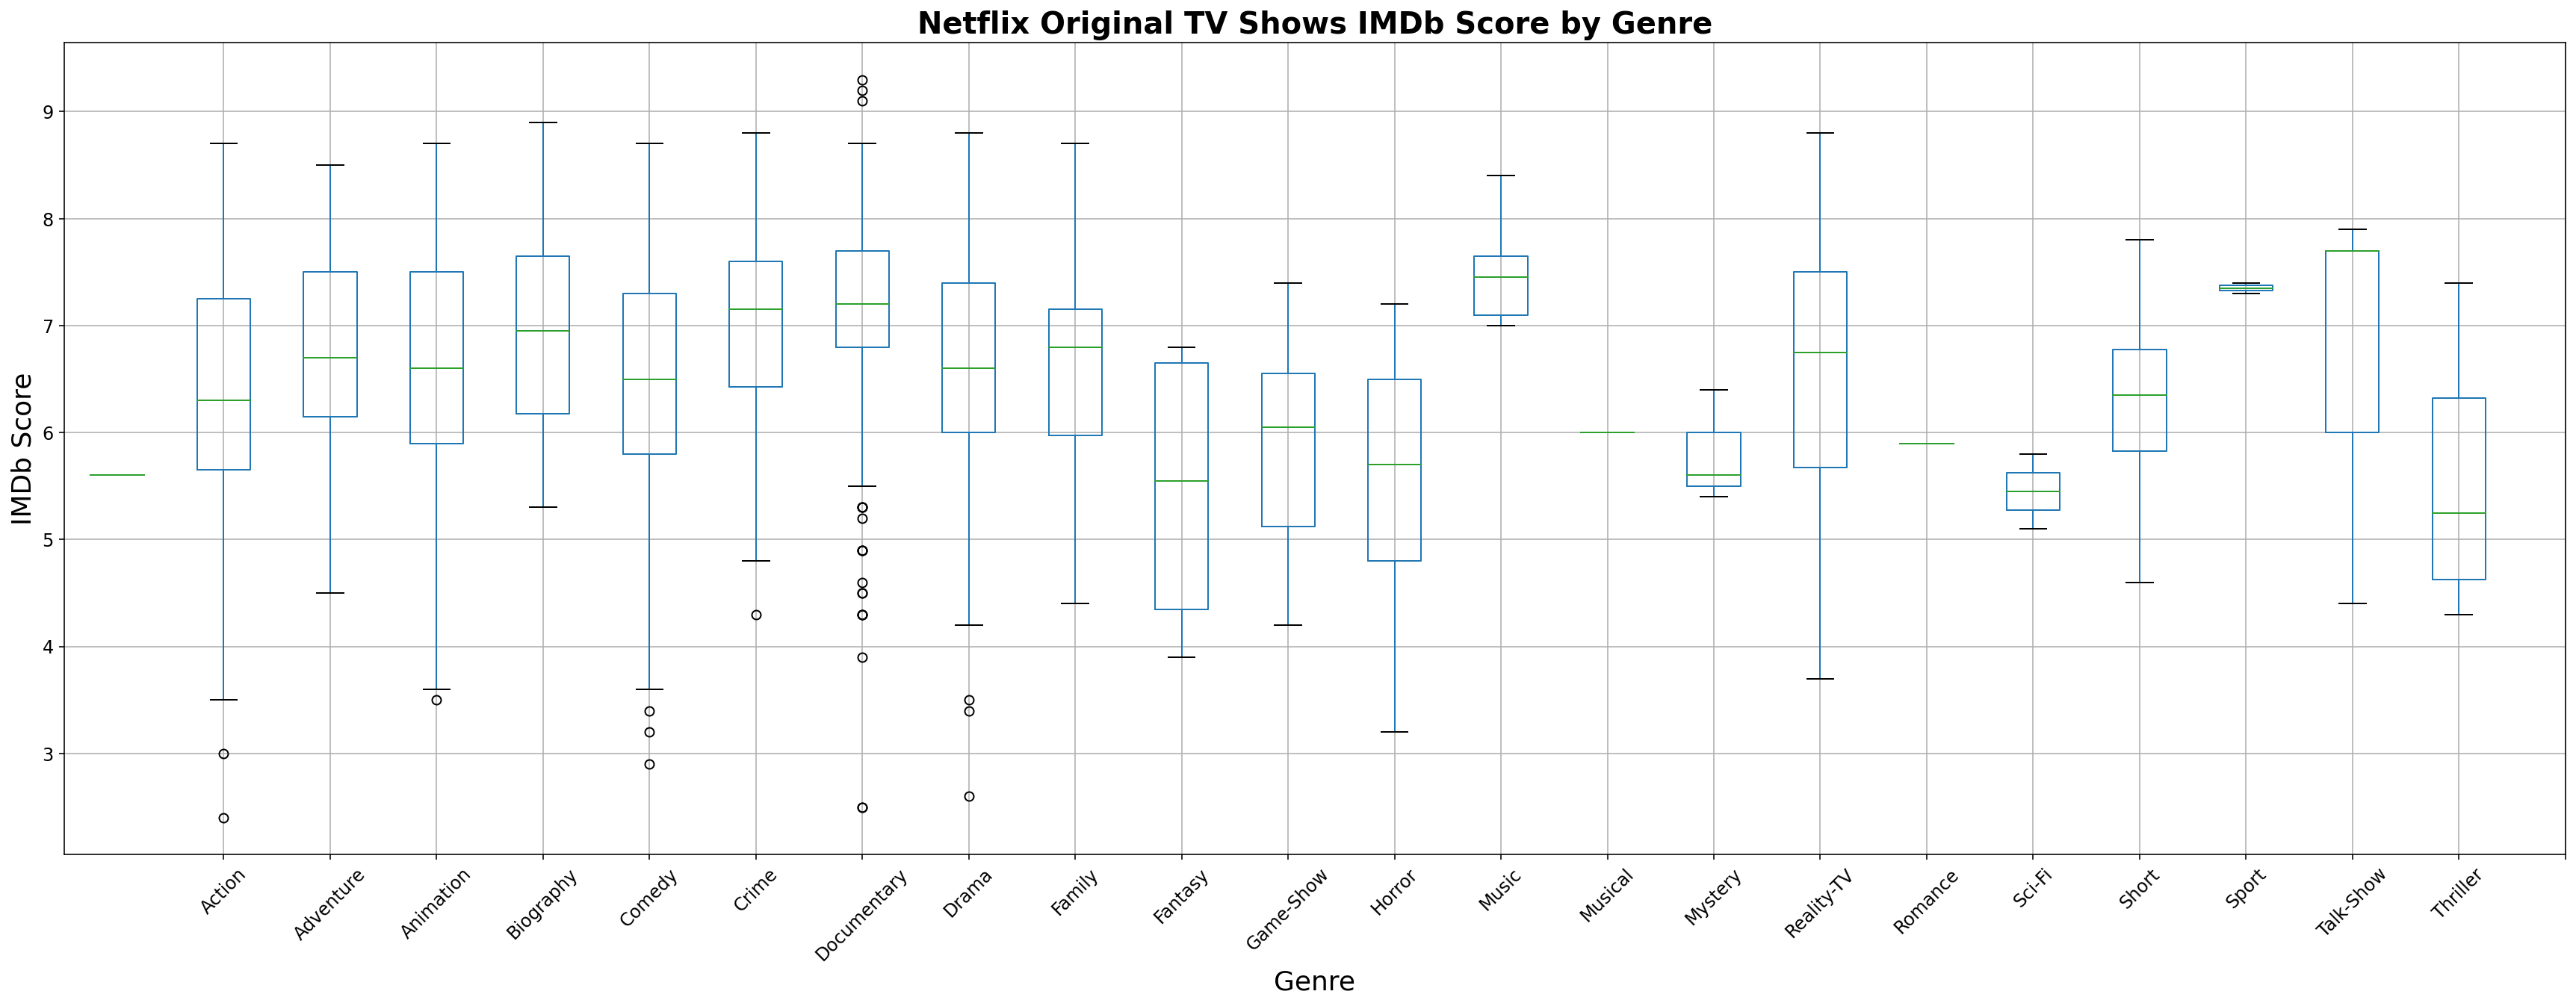

In [ ]:
#creating df with just imdb scores and making box plot
imdb_tv = merged.drop(columns=['#_of_reviews','Year_released','Sentiment_Score','Intensity_Score'], axis = 1)
grouped = imdb_tv.groupby("Genre")

fig = grouped.boxplot(rot=45, fontsize = 12 , figsize=(30,10), subplots=False,)
plt.xticks([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,18, 19, 20, 21, 22, 23, 24], ['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller' ])

plt.xlabel('Genre', fontsize = 18)
plt.ylabel('IMDb Score', fontsize = 18)
plt.title("Netflix Original TV Shows IMDb Score by Genre", fontsize=20, fontweight='bold')
plt.savefig('Netflix Original TV Shows IMDb Score by Genre.pdf')

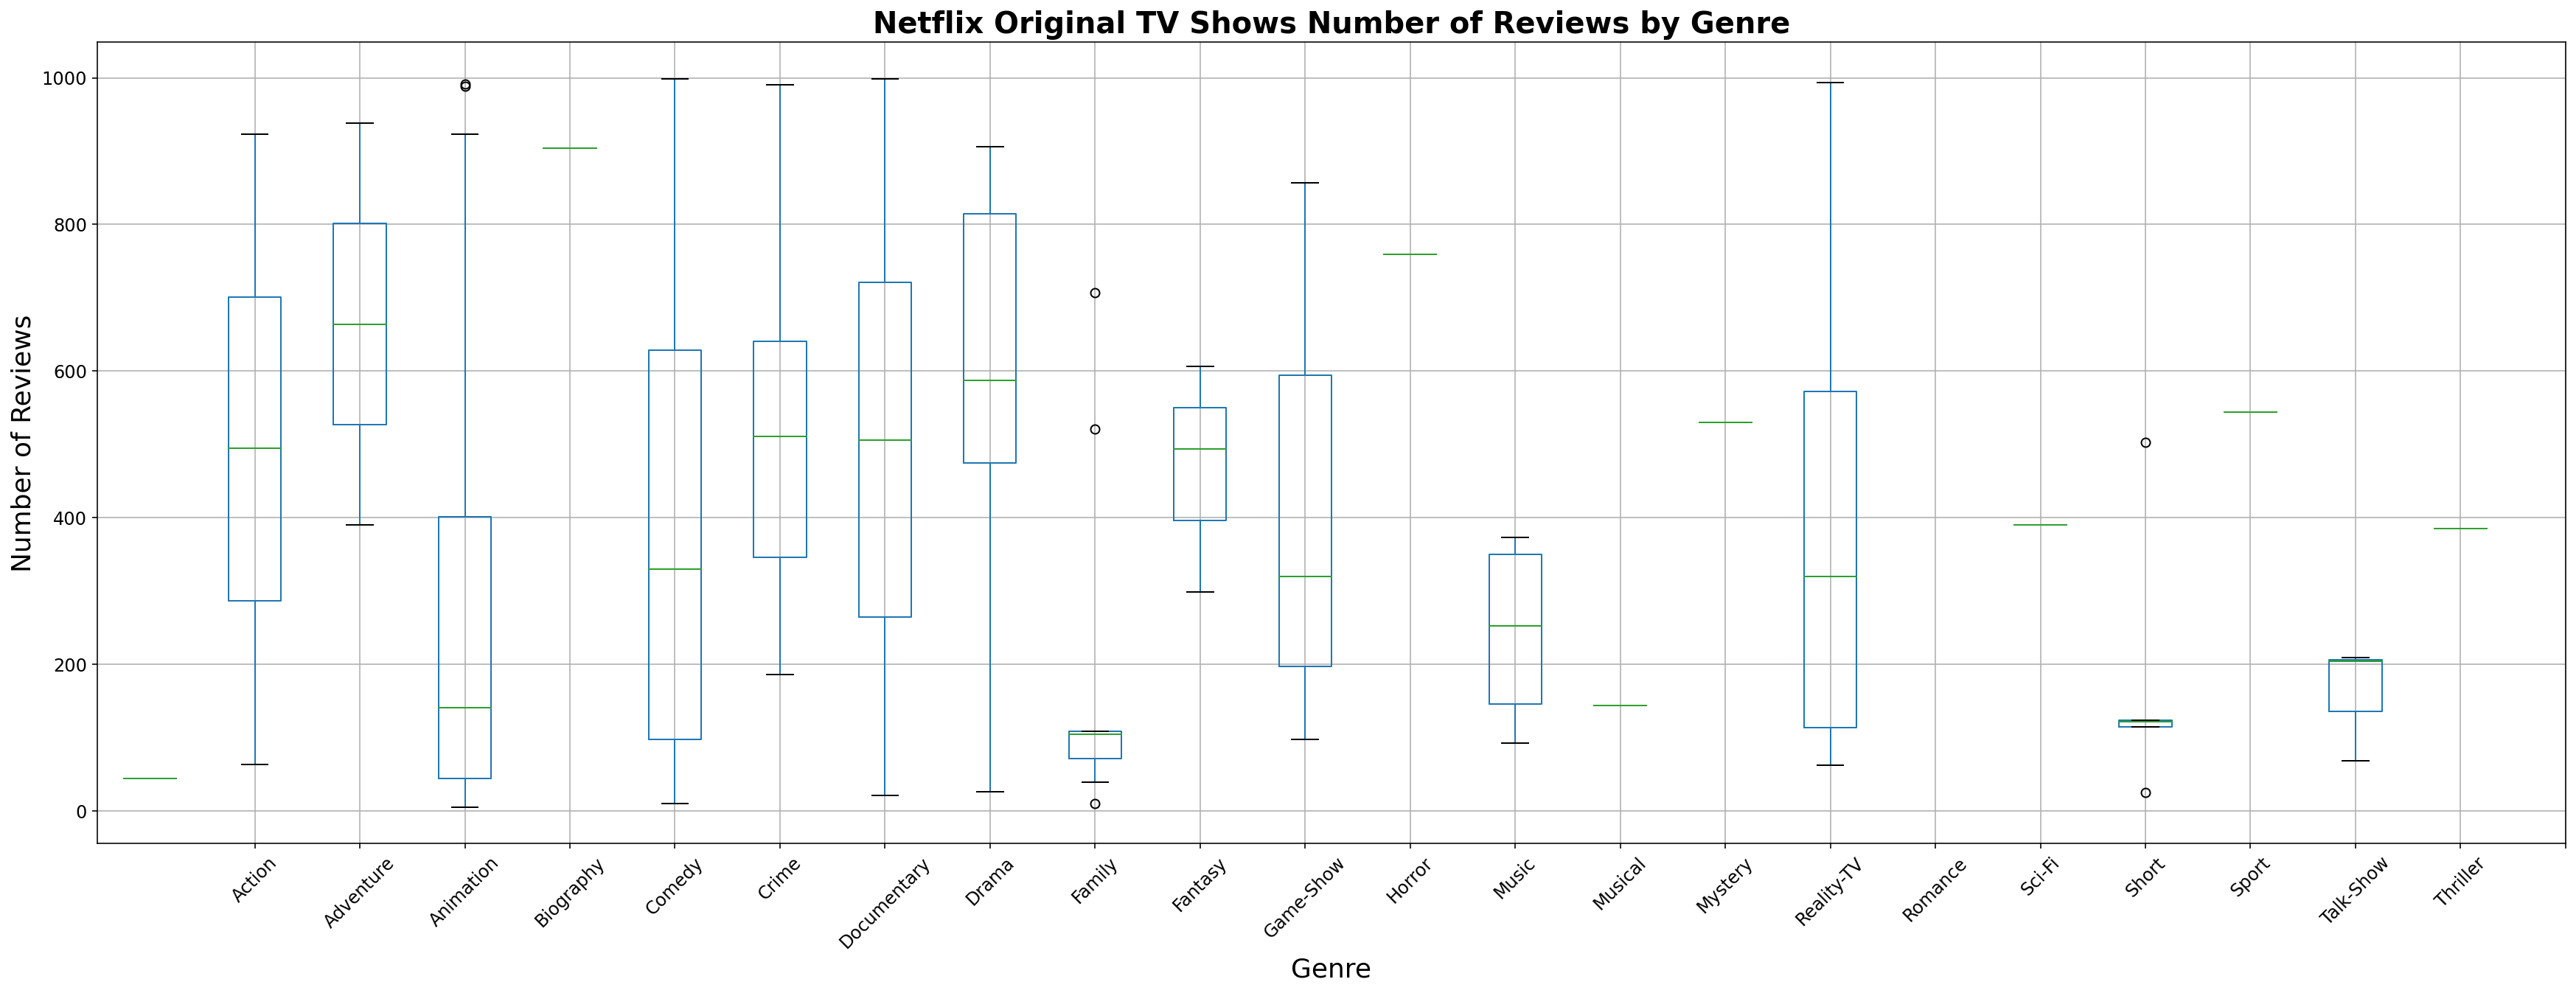

In [ ]:
#creating df with just number of reviews and making box plot
reviews_tv = merged.drop(columns=['IMDb Grade','Year_released','Sentiment_Score', 'Intensity_Score'], axis = 1)
grouped = reviews_tv.groupby("Genre")

fig = grouped.boxplot(rot=45, fontsize = 12 , figsize=(30,10), subplots=False,)
plt.xticks([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,18, 19, 20, 21, 22, 23, 24], [
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller' ])

plt.xlabel('Genre', fontsize = 18)
plt.ylabel('Number of Reviews', fontsize = 18)
plt.title("Netflix Original TV Shows Number of Reviews by Genre", fontsize=20, fontweight='bold')
plt.savefig('Netflix Original TV Shows Number of Reviews by Genre.pdf')

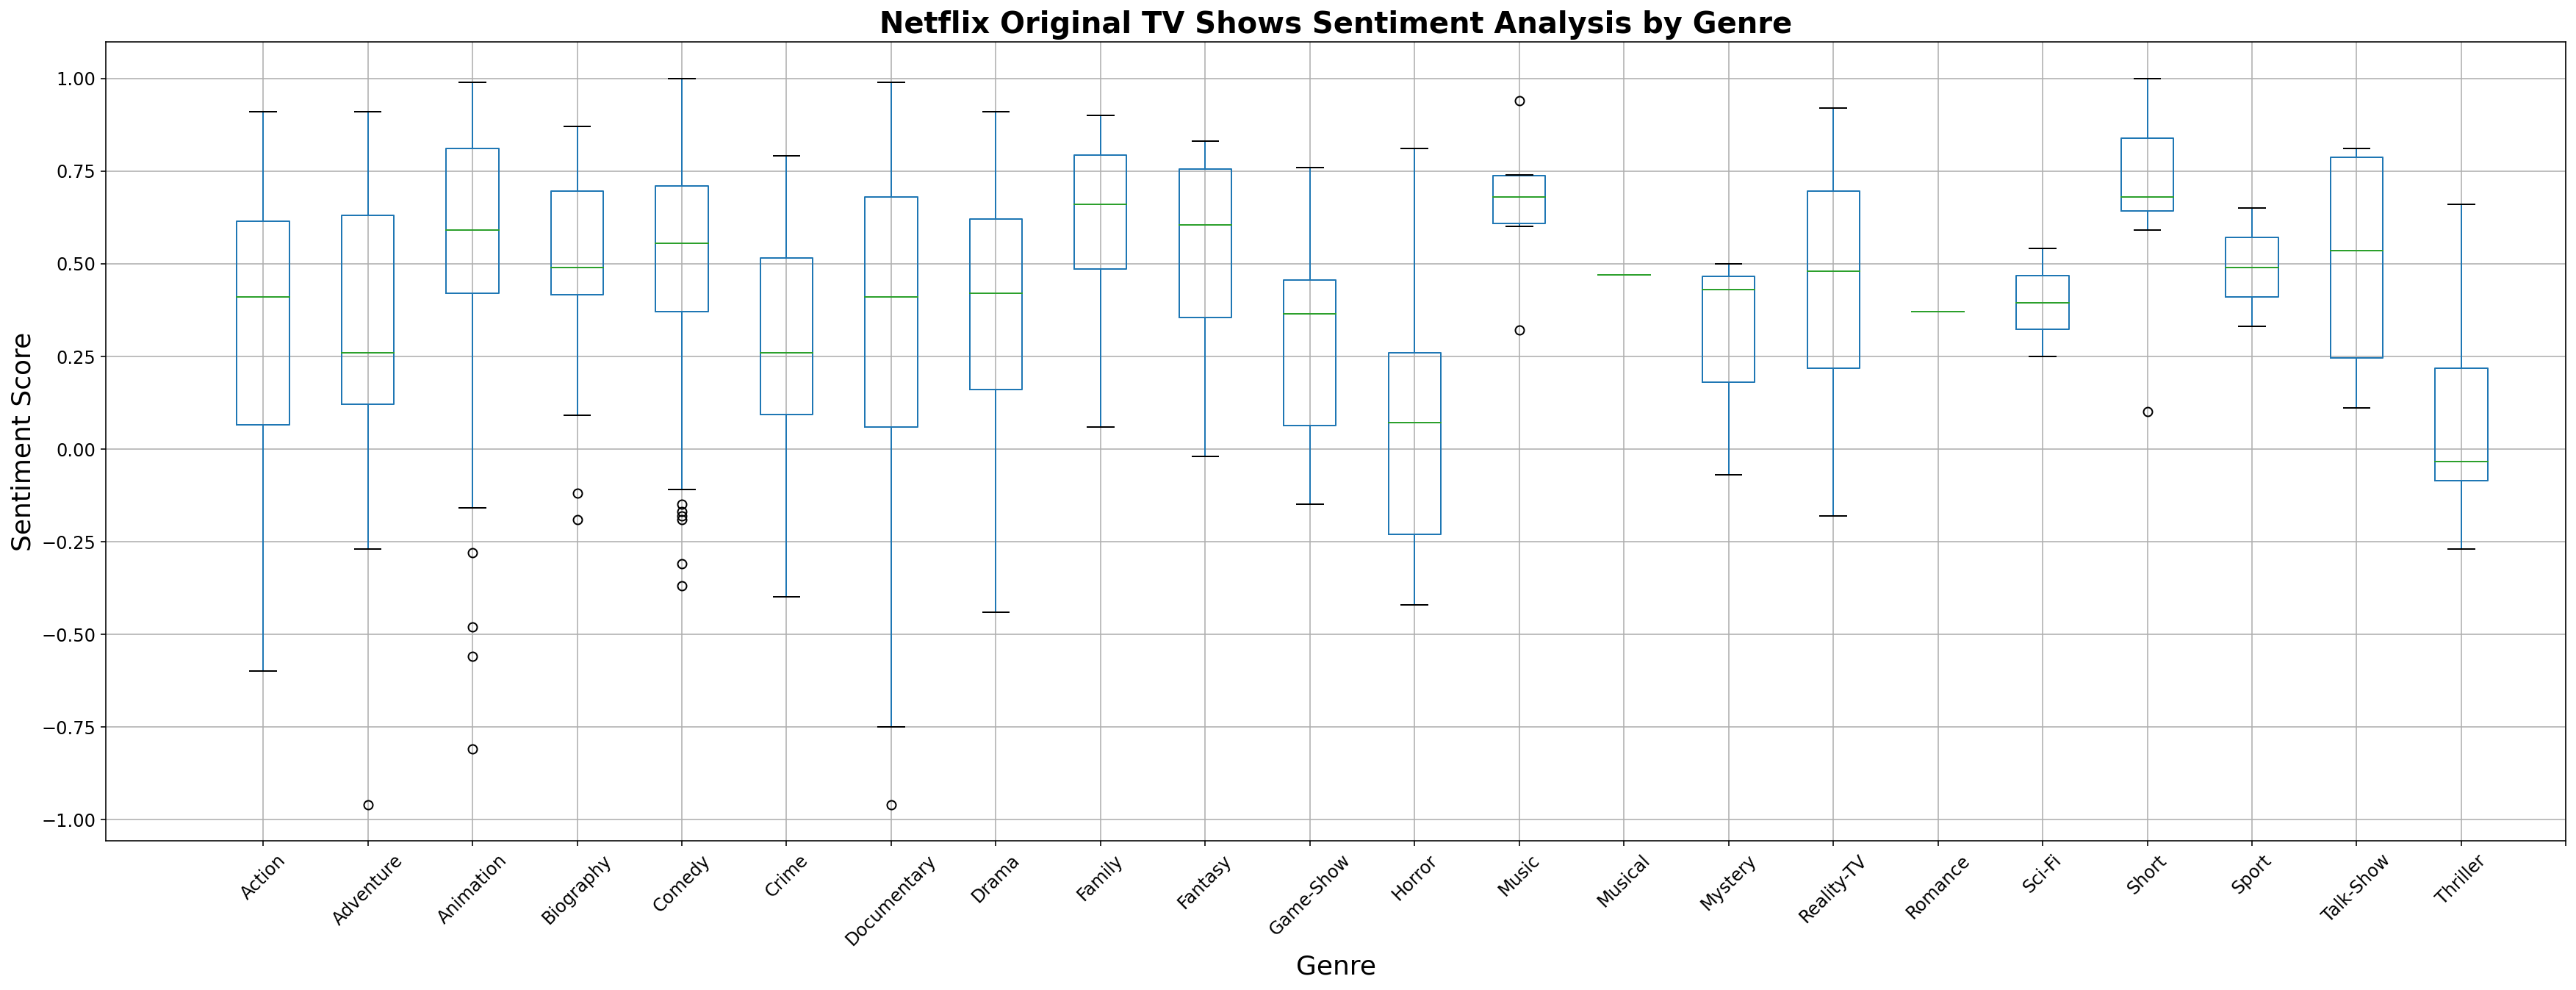

In [ ]:
#creating df with just sentiment score and making box plot
sentiment_tv = merged.drop(columns=['IMDb Grade','Year_released','#_of_reviews', 'Intensity_Score'], axis = 1)
grouped = sentiment_tv.groupby("Genre")

fig = grouped.boxplot(rot=45, fontsize = 12 , figsize=(30,10), subplots=False,)
plt.xticks([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,18, 19, 20, 21, 22, 23, 24], [
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller' ])

plt.xlabel('Genre', fontsize = 18)
plt.ylabel('Sentiment Score', fontsize = 18)
plt.title("Netflix Original TV Shows Sentiment Analysis by Genre", fontsize=20, fontweight='bold')
plt.savefig('Netflix Original TV Shows Sentiment Analysis by Genre.pdf')

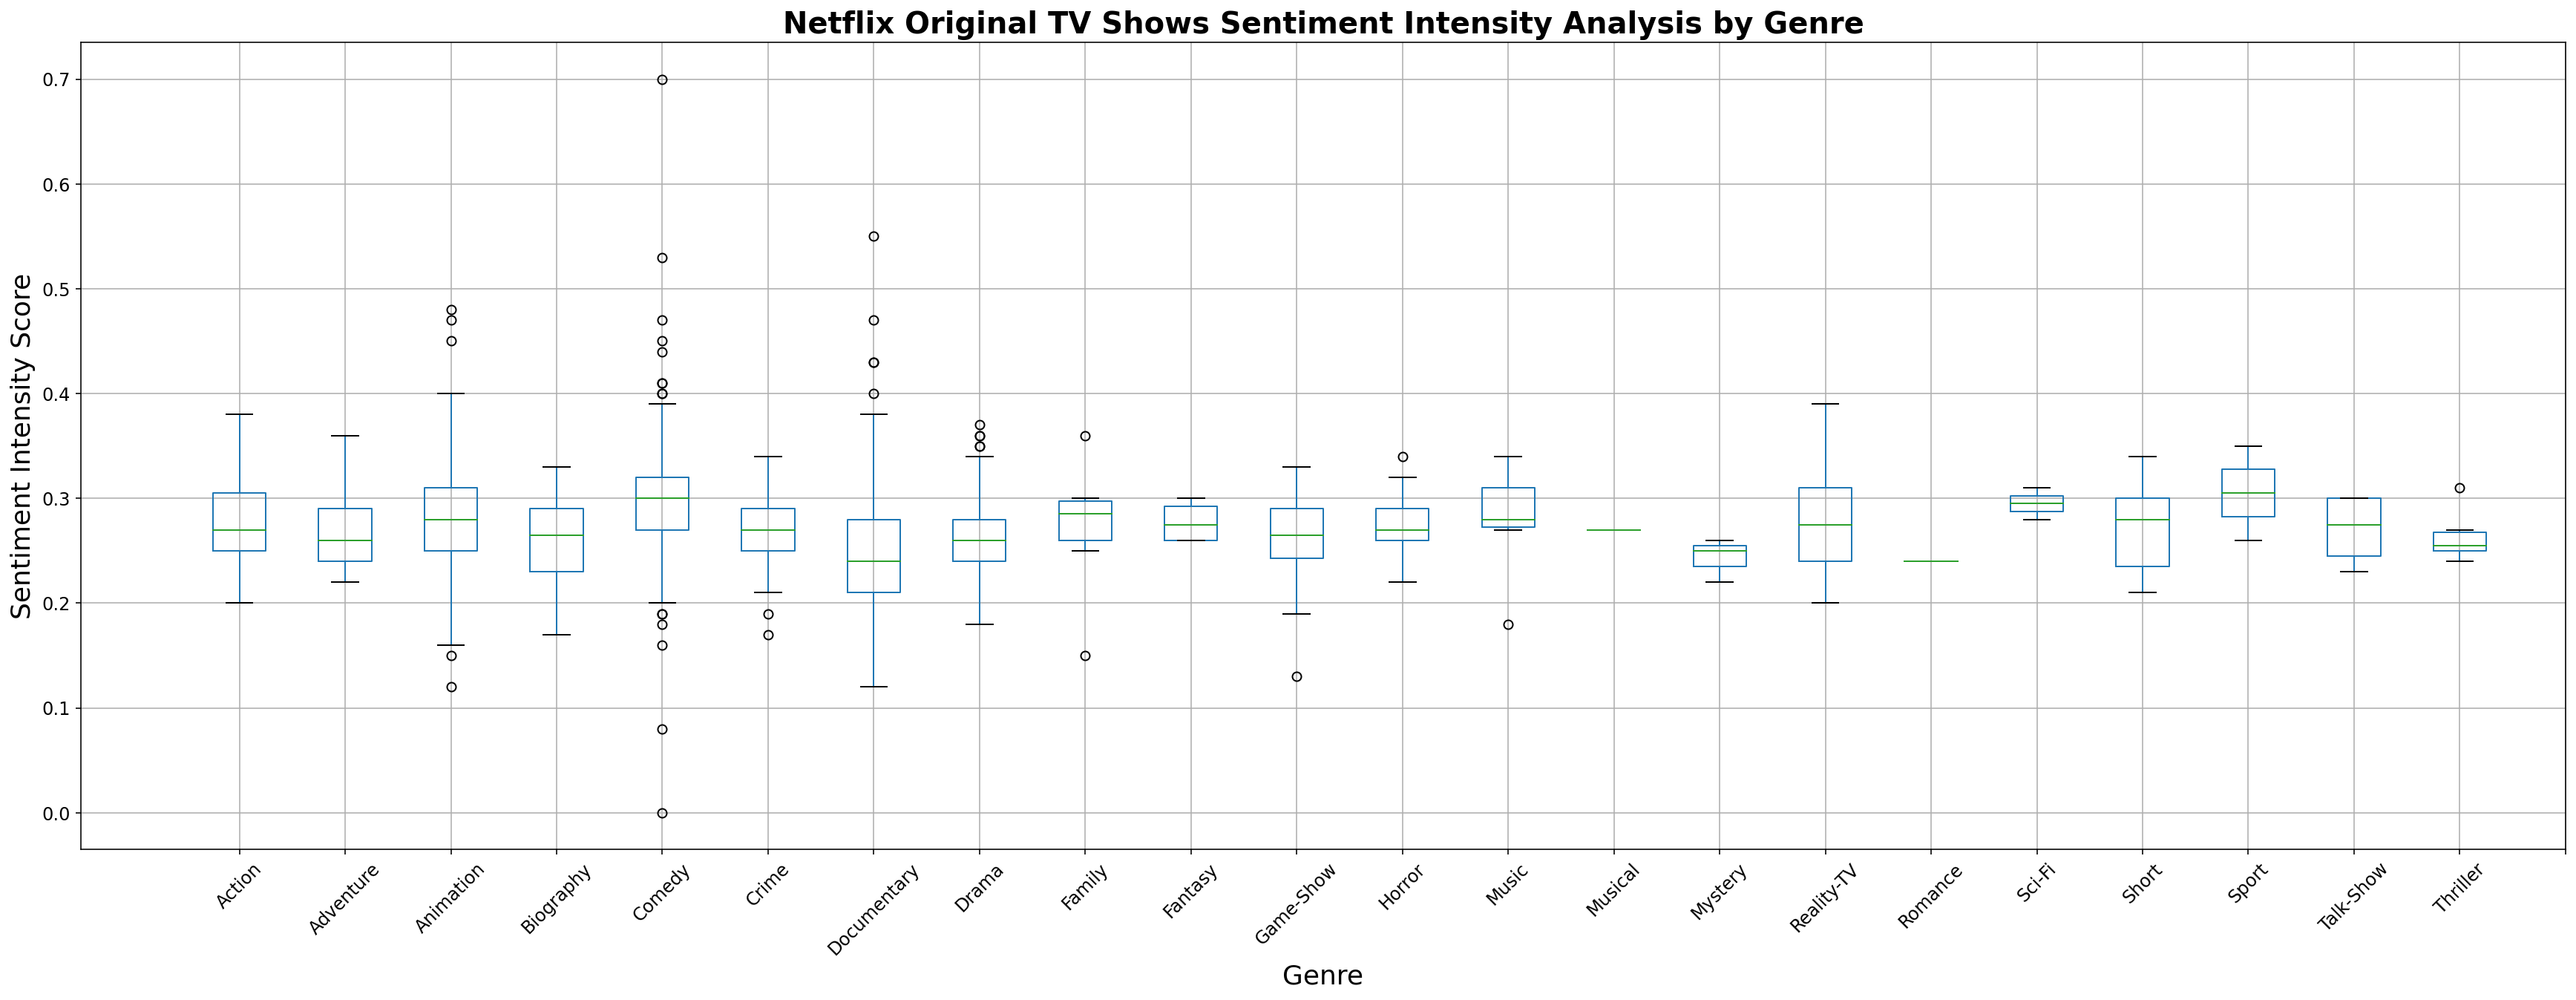

In [ ]:
#creating df with just intensity score and making box plot
intensity_tv = merged.drop(columns=['IMDb Grade','Year_released','#_of_reviews', 'Sentiment_Score'], axis = 1)
grouped = intensity_tv.groupby("Genre")

fig = grouped.boxplot(rot=45, fontsize = 12 , figsize=(30,10), subplots=False,)
plt.xticks([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,18, 19, 20, 21, 22, 23, 24], [
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller' ])

plt.xlabel('Genre', fontsize = 18)
plt.ylabel('Sentiment Intensity Score', fontsize = 18)
plt.title("Netflix Original TV Shows Sentiment Intensity Analysis by Genre", fontsize=20, fontweight='bold')
plt.savefig('Netflix Original TV Shows Sentiment Intensity Analysis by Genre.pdf')

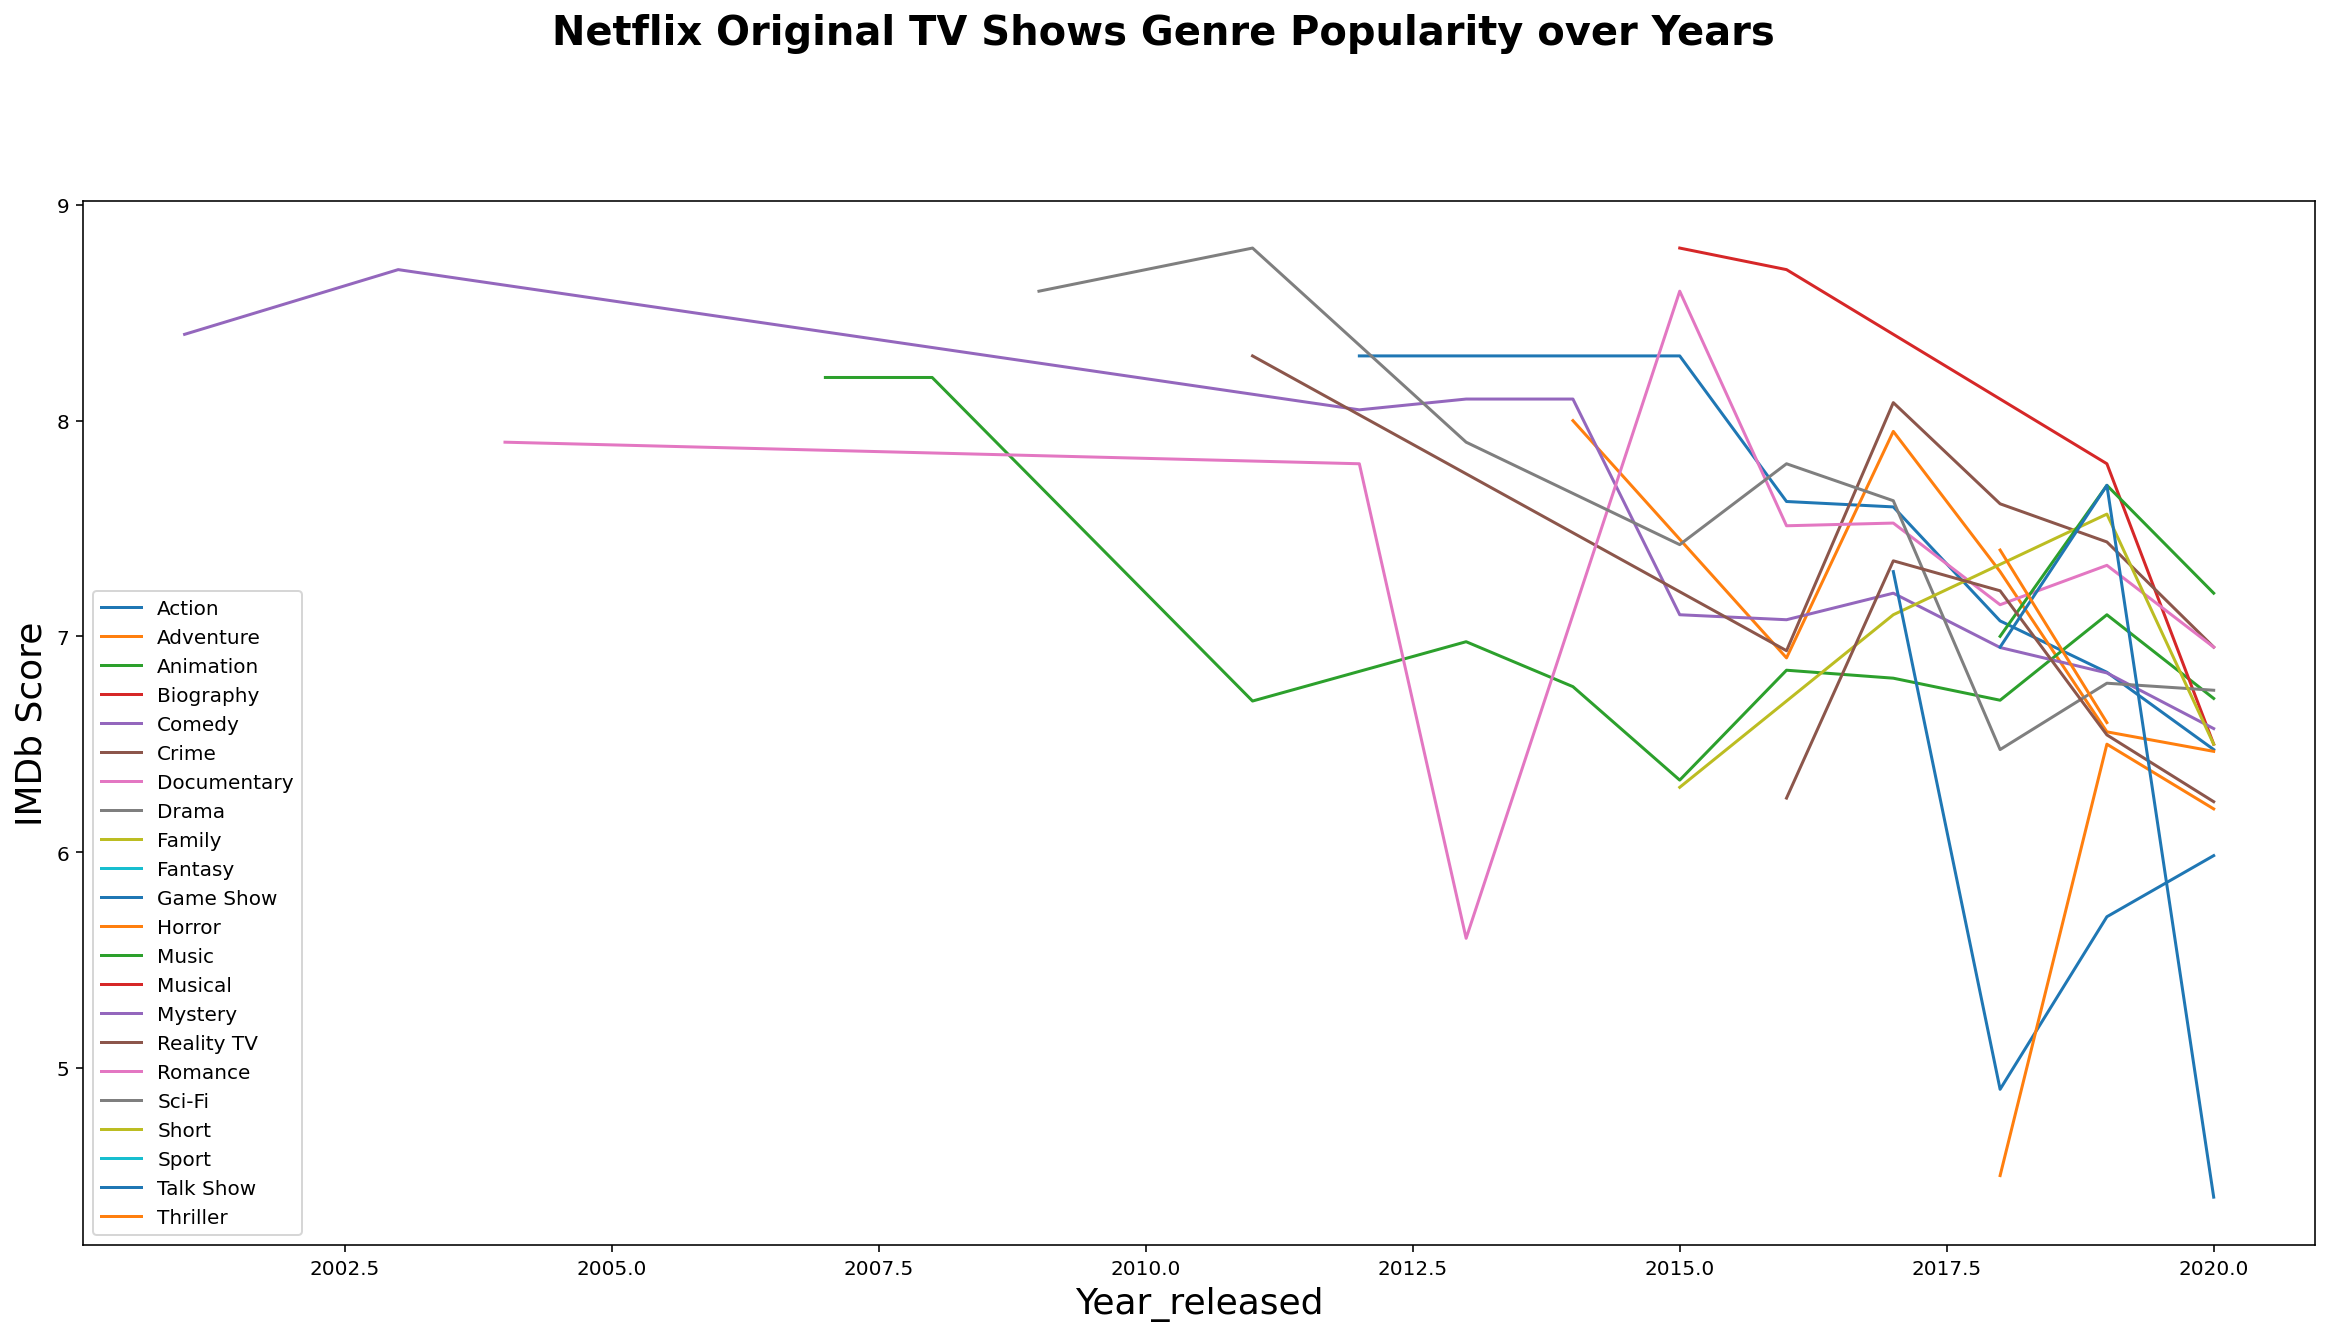

In [ ]:
#how have the popularity of some genres of tv shows changed over the years?
#create line plot to track average imdb scores of each genre over years

imdb_with_year = merged.drop(columns=['#_of_reviews','Sentiment_Score','Intensity_Score'], axis = 1)

fig= plt.figure(figsize=(20,10))
fig.suptitle('Netflix Original TV Shows Genre Popularity over Years', fontsize=20, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('IMDb Score', fontsize=18)

Action = imdb_with_year[imdb_with_year['Genre']=='Action']
avg_action = Action.groupby('Year_released')['IMDb Grade'].agg('mean')

Adventure = imdb_with_year[imdb_with_year['Genre']=='Adventure']
avg_adventure = Adventure.groupby('Year_released')['IMDb Grade'].agg('mean')

Animation = imdb_with_year[imdb_with_year['Genre']=='Animation']
avg_animation = Animation.groupby('Year_released')['IMDb Grade'].agg('mean')

Biography = imdb_with_year[imdb_with_year['Genre']=='Biography']
avg_biography = Biography.groupby('Year_released')['IMDb Grade'].agg('mean')

Comedy = imdb_with_year[imdb_with_year['Genre']=='Comedy']
avg_comedy = Comedy.groupby('Year_released')['IMDb Grade'].agg('mean')

Crime = imdb_with_year[imdb_with_year['Genre']=='Crime']
avg_crime = Crime.groupby('Year_released')['IMDb Grade'].agg('mean')

Documentary = imdb_with_year[imdb_with_year['Genre']=='Documentary']
avg_documentary = Documentary.groupby('Year_released')['IMDb Grade'].agg('mean')

Drama = imdb_with_year[imdb_with_year['Genre']=='Drama']
avg_drama = Drama.groupby('Year_released')['IMDb Grade'].agg('mean')

Family = imdb_with_year[imdb_with_year['Genre']=='Family']
avg_family = Family.groupby('Year_released')['IMDb Grade'].agg('mean')

Fantasy = imdb_with_year[imdb_with_year['Genre']=='Fanstasy']
avg_fantasy = Fantasy.groupby('Year_released')['IMDb Grade'].agg('mean')

Game_Show = imdb_with_year[imdb_with_year['Genre']=='Game-Show']
avg_game_show = Game_Show.groupby('Year_released')['IMDb Grade'].agg('mean')

Horror = imdb_with_year[imdb_with_year['Genre']=='Horror']
avg_horror = Horror.groupby('Year_released')['IMDb Grade'].agg('mean')

Music = imdb_with_year[imdb_with_year['Genre']=='Music']
avg_music = Music.groupby('Year_released')['IMDb Grade'].agg('mean')

Musical = imdb_with_year[imdb_with_year['Genre']=='Musical']
avg_musical = Musical.groupby('Year_released')['IMDb Grade'].agg('mean')

Mystery = imdb_with_year[imdb_with_year['Genre']=='Mystery']
avg_mystery = Mystery.groupby('Year_released')['IMDb Grade'].agg('mean')

Reality_TV = imdb_with_year[imdb_with_year['Genre']=='Reality-TV']
avg_reality_tv = Reality_TV.groupby('Year_released')['IMDb Grade'].agg('mean')

Romance = imdb_with_year[imdb_with_year['Genre']=='Romance']
avg_romance = Romance.groupby('Year_released')['IMDb Grade'].agg('mean')

Sci_Fi = imdb_with_year[imdb_with_year['Genre']=='Sci-Fi']
avg_sci_fi = Sci_Fi.groupby('Year_released')['IMDb Grade'].agg('mean')

Short = imdb_with_year[imdb_with_year['Genre']=='Short']
avg_short = Short.groupby('Year_released')['IMDb Grade'].agg('mean')

Sport = imdb_with_year[imdb_with_year['Genre']=='Sport']
avg_sport = Sport.groupby('Year_released')['IMDb Grade'].agg('mean')

Talk_Show = imdb_with_year[imdb_with_year['Genre']=='Talk-Show']
avg_talk_show = Talk_Show.groupby('Year_released')['IMDb Grade'].agg('mean')

Thriller = imdb_with_year[imdb_with_year['Genre']=='Thriller']
avg_thriller = Thriller.groupby('Year_released')['IMDb Grade'].agg('mean')

avg_action.plot(label='Action')
avg_adventure.plot(label='Adventure')
avg_animation.plot(label='Animation')
avg_biography.plot(label='Biography')
avg_comedy.plot(label='Comedy')
avg_crime.plot(label='Crime')
avg_documentary.plot(label='Documentary')
avg_drama.plot(label='Drama')
avg_family.plot(label='Family')
avg_fantasy.plot(label='Fantasy')
avg_game_show.plot(label='Game Show')
avg_horror.plot(label='Horror')
avg_music.plot(label='Music')
avg_musical.plot(label='Musical')
avg_mystery.plot(label='Mystery')
avg_reality_tv.plot(label='Reality TV') 
avg_romance.plot(label='Romance')
avg_sci_fi.plot(label='Sci-Fi')
avg_short.plot(label='Short')
avg_sport.plot(label='Sport')
avg_talk_show.plot(label='Talk Show')
avg_thriller.plot(label='Thriller')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

fig.savefig('Netflix Original TV Shows Genre Popularity over Years.pdf')

In [ ]:
#changing dtypes
merged2['IMDb Grade'] = pd.to_numeric(merged2['IMDb Grade'],errors = 'coerce')
merged2['#_of_reviews'] = pd.to_numeric(merged2['#_of_reviews'],errors = 'coerce')
merged2['Year_released'] = pd.to_numeric(merged2['Year_released'],errors = 'coerce')
merged2['Sentiment_Score'] = pd.to_numeric(merged2['Sentiment_Score'],errors = 'coerce')
merged2['Intensity_Score'] = pd.to_numeric(merged2['Intensity_Score'],errors = 'coerce')

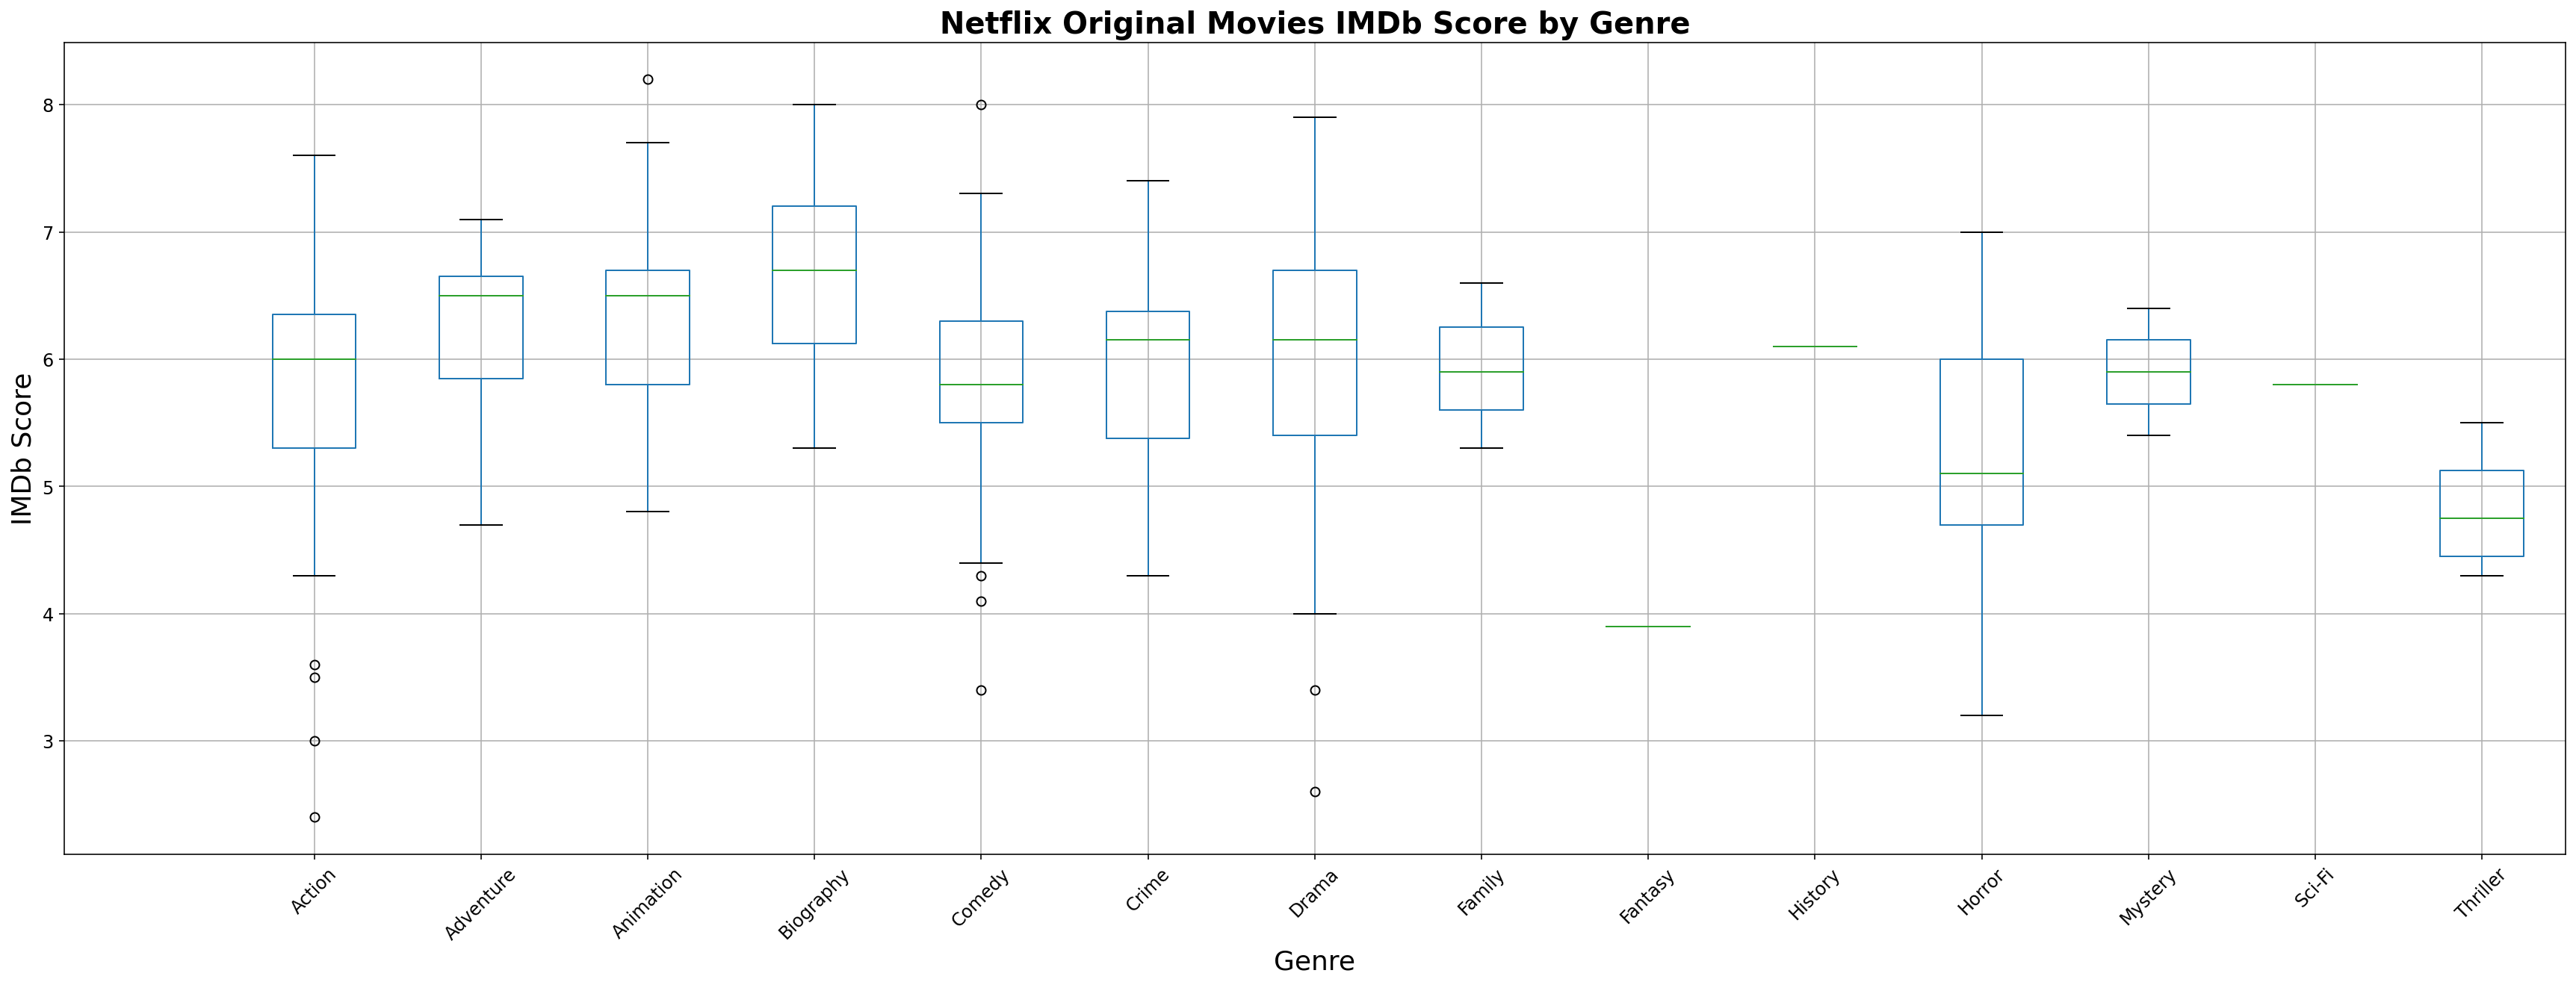

In [ ]:
#creating df with just imdb scores and making box plot
imdb_movie = merged2.drop(columns=['#_of_reviews','Year_released','Sentiment_Score', 'Intensity_Score'], axis = 1)
grouped = imdb_movie.groupby("Genre")

fig1 = grouped.boxplot( rot=45, fontsize = 12 , figsize=(30,10), subplots=False,)
plt.xticks([ 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'Thriller'])


plt.xlabel('Genre', fontsize = 18)
plt.ylabel('IMDb Score', fontsize = 18)
plt.title("Netflix Original Movies IMDb Score by Genre", fontsize=20, fontweight='bold')
plt.savefig('Netflix Original Movies IMDb Score by Genre.pdf')

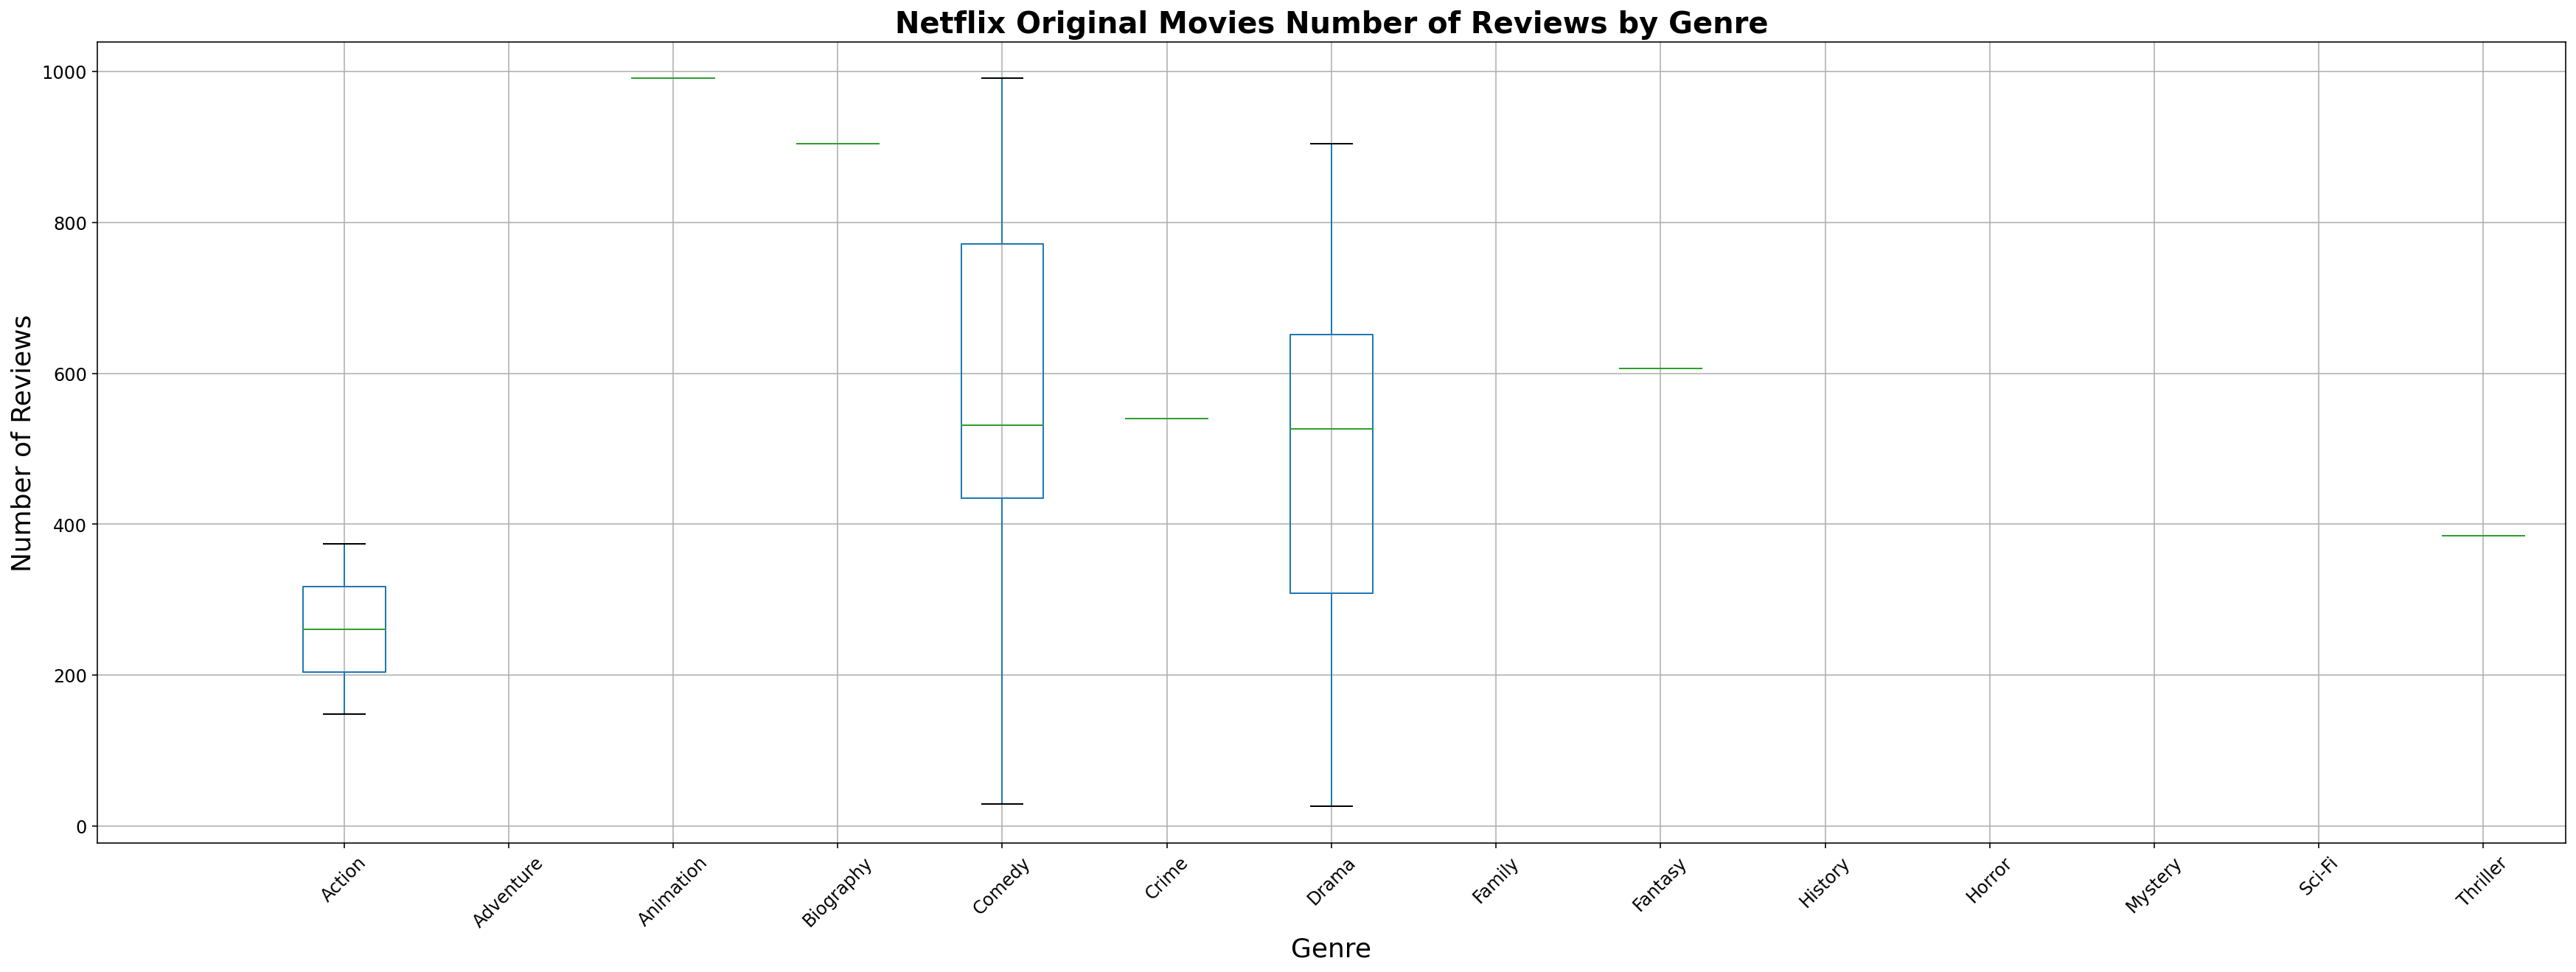

In [ ]:
#creating df with just number of reviews and making box plot
reviews_movie = merged2.drop(columns=['IMDb Grade', 'Year_released','Sentiment_Score', 'Intensity_Score'], axis = 1)
grouped = reviews_movie.groupby("Genre")

fig1 = grouped.boxplot( rot=45, fontsize = 12 , figsize=(30,10), subplots=False,)
plt.xticks([ 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'Thriller'])


plt.xlabel('Genre', fontsize = 18)
plt.ylabel('Number of Reviews', fontsize = 18)
plt.title("Netflix Original Movies Number of Reviews by Genre", fontsize=20, fontweight='bold')
plt.savefig('Netflix Original Movies Number of Reviews by Genre.pdf')

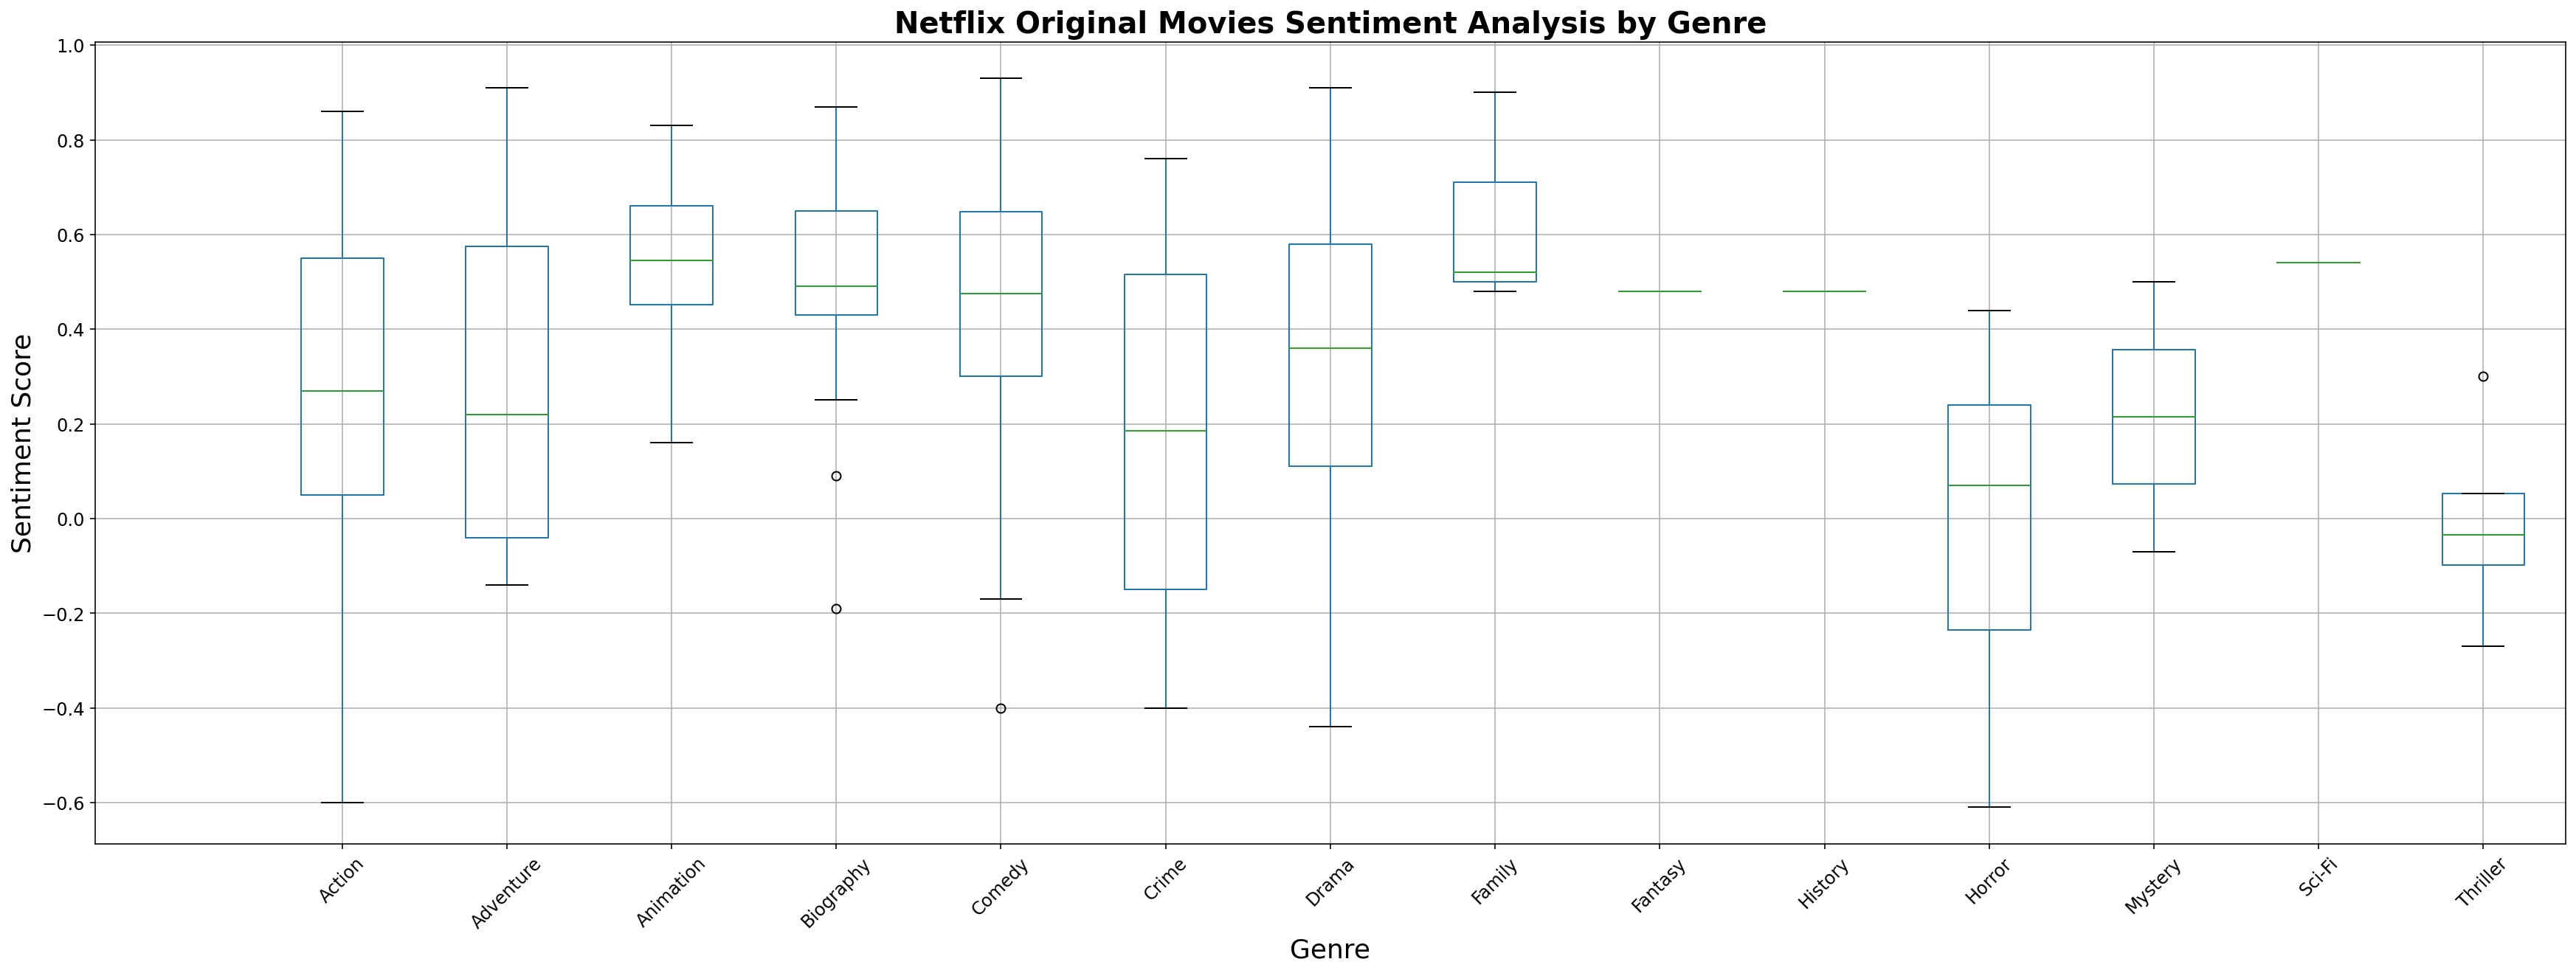

In [ ]:
#creating df with just sentiment scores and making box plot
sentiment_movie = merged2.drop(columns=['IMDb Grade', 'Year_released','#_of_reviews', 'Intensity_Score'], axis = 1)
grouped = sentiment_movie.groupby("Genre")

fig1 = grouped.boxplot( rot=45, fontsize = 12 , figsize=(30,10), subplots=False,)
plt.xticks([ 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'Thriller'])


plt.xlabel('Genre', fontsize = 18)
plt.ylabel('Sentiment Score', fontsize = 18)
plt.title("Netflix Original Movies Sentiment Analysis by Genre", fontsize=20, fontweight='bold')
plt.savefig('Netflix Original Movies Sentiment Analysis by Genre.pdf')

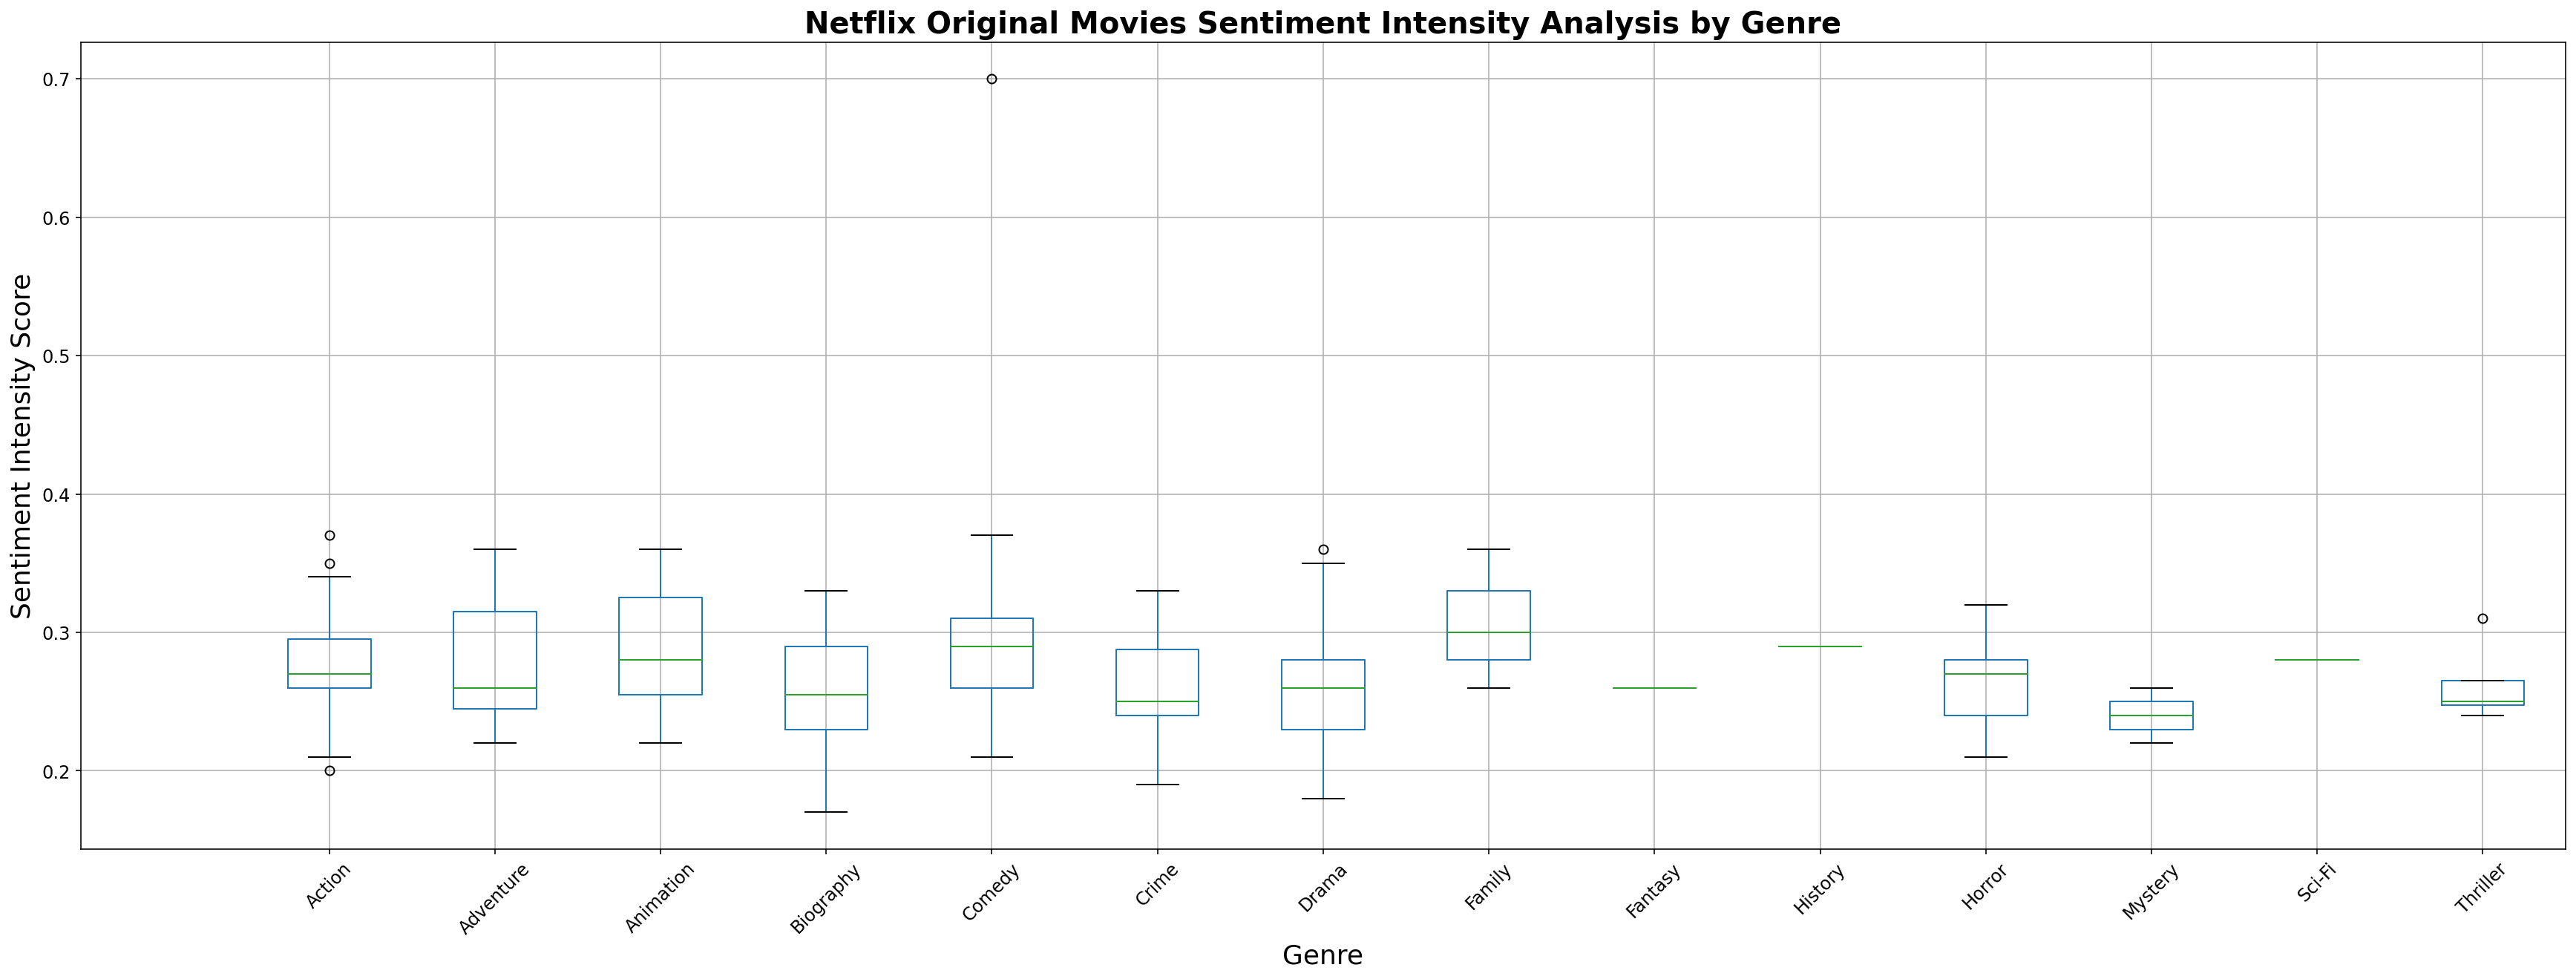

In [ ]:
#creating df with just intensity scores and making box plot
sentiment_movie = merged2.drop(columns=['IMDb Grade', 'Year_released','#_of_reviews', 'Sentiment_Score'], axis = 1)
grouped = sentiment_movie.groupby("Genre")

fig1 = grouped.boxplot( rot=45, fontsize = 12 , figsize=(30,10), subplots=False,)
plt.xticks([ 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'Thriller'])


plt.xlabel('Genre', fontsize = 18)
plt.ylabel('Sentiment Intensity Score', fontsize = 18)
plt.title("Netflix Original Movies Sentiment Intensity Analysis by Genre", fontsize=20, fontweight='bold')
plt.savefig('Netflix Original Movies Sentiment Intensity Analysis by Genre.pdf')

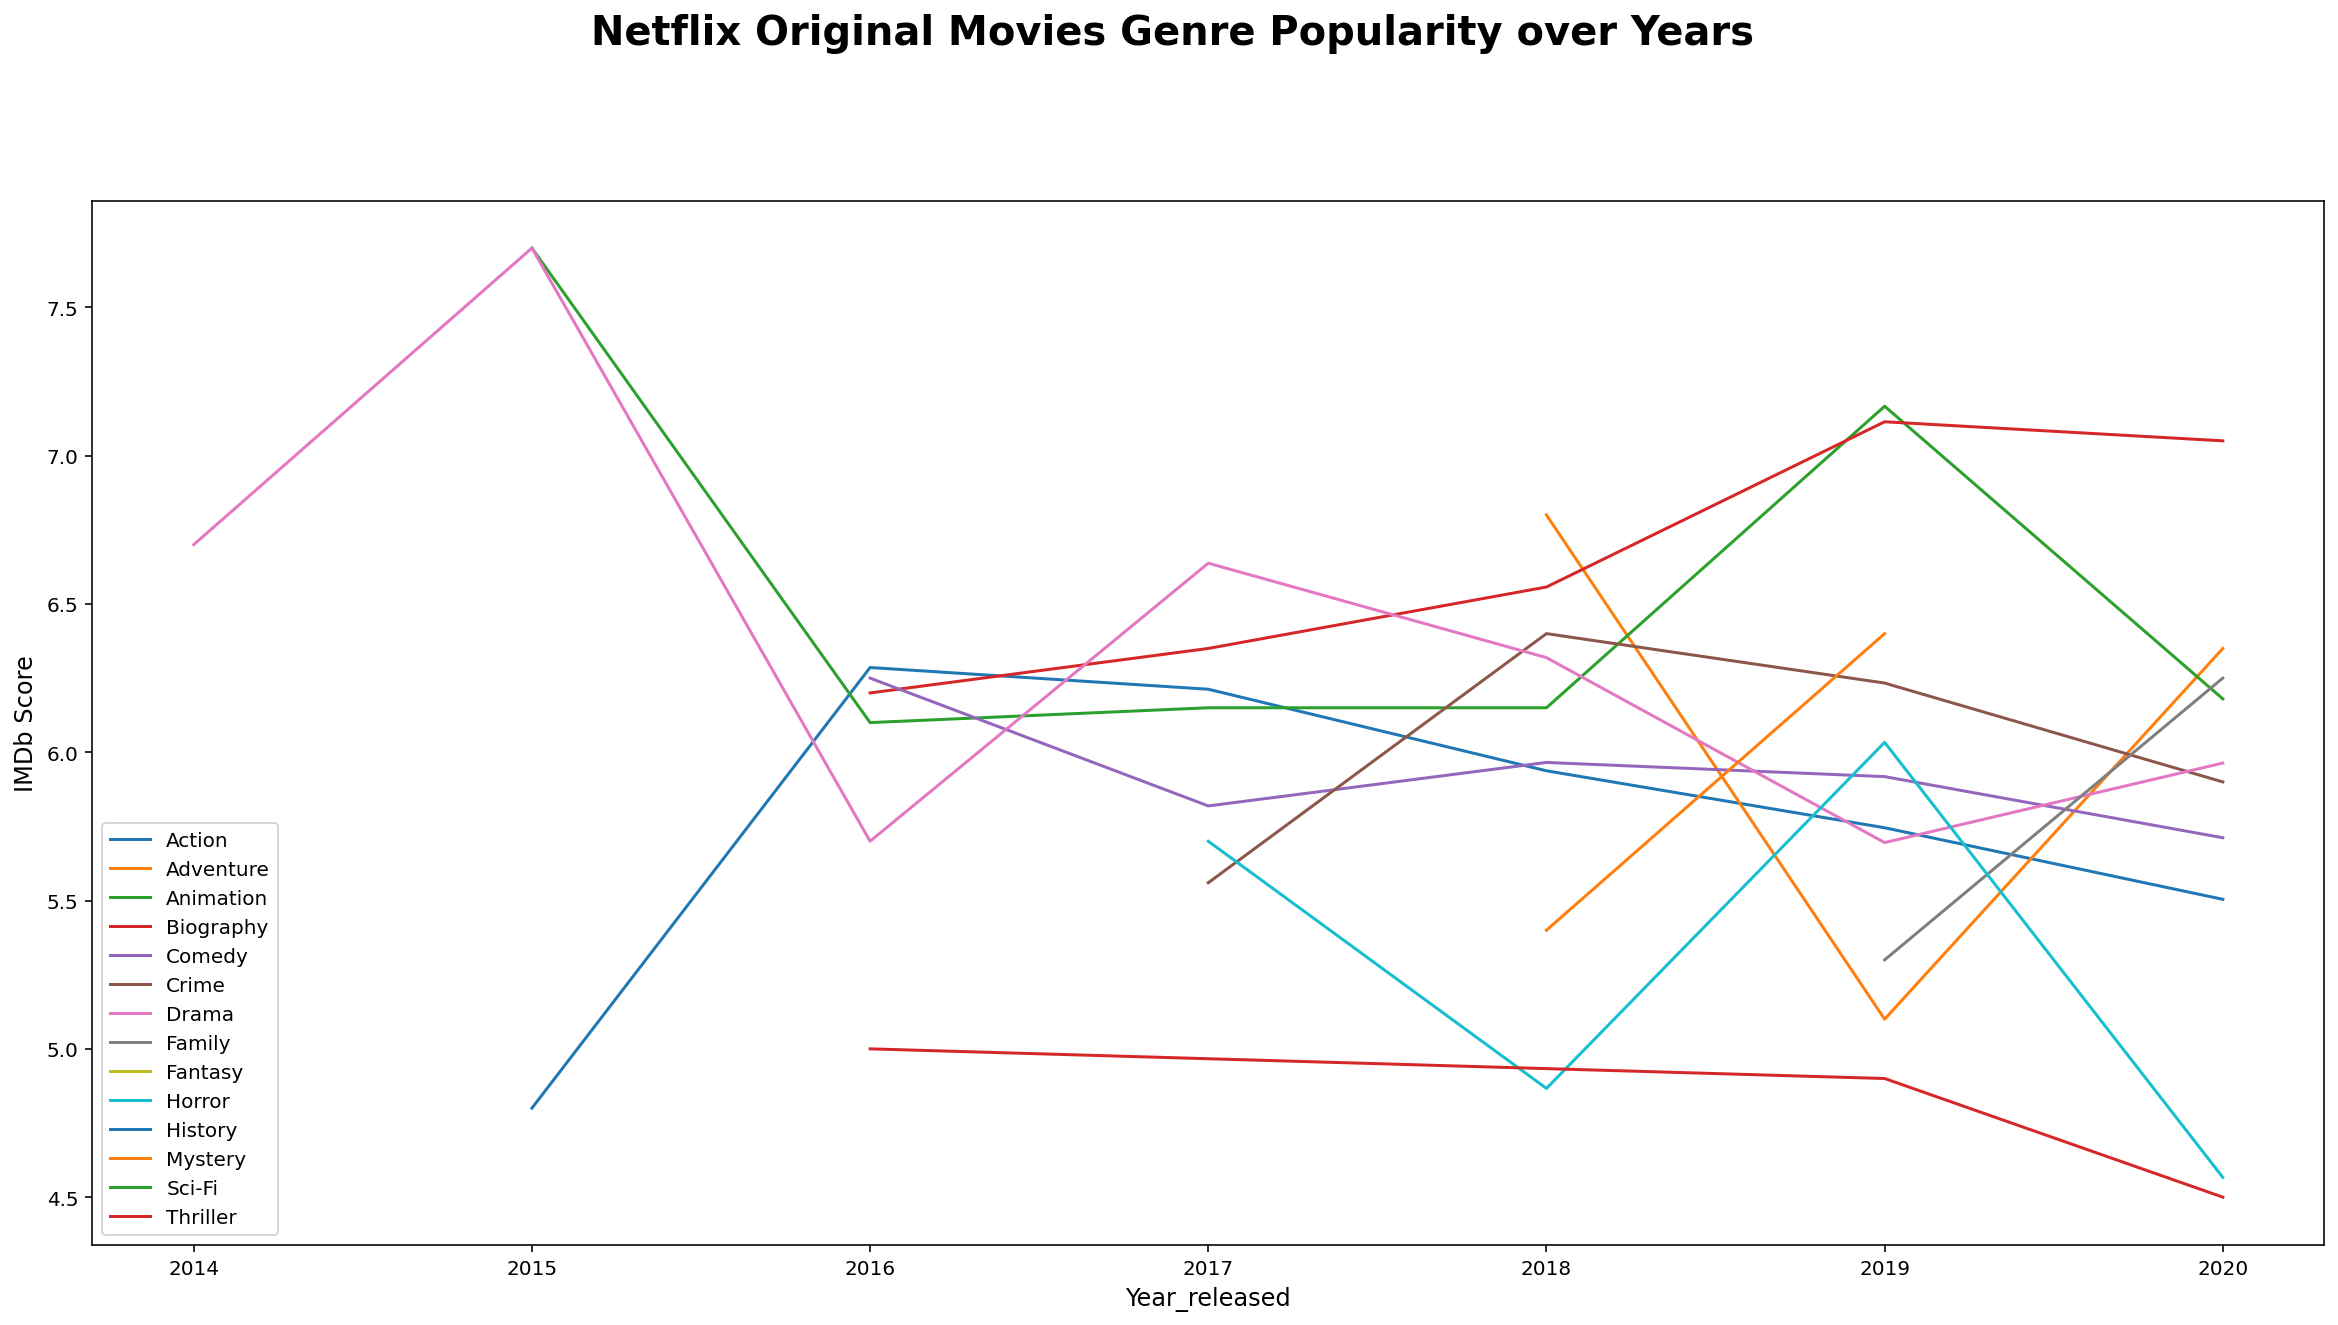

In [ ]:
#how has the popularity of each genre changed over the years? 
#plotting the changes in average genre imdb ratings over years

imdb_movie_with_year = merged2.drop(columns=['#_of_reviews','Sentiment_Score','Intensity_Score'], axis = 1)

fig= plt.figure(figsize=(20,10))
fig.suptitle('Netflix Original Movies Genre Popularity over Years', fontsize=20, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('IMDb Score', fontsize=12)

Action = imdb_movie_with_year[imdb_movie_with_year['Genre']=='Action']
avg_action = Action.groupby('Year_released')['IMDb Grade'].agg('mean')

Adventure = imdb_movie_with_year[imdb_movie_with_year['Genre']=='Adventure']
avg_adventure = Adventure.groupby('Year_released')['IMDb Grade'].agg('mean')

Animation = imdb_movie_with_year[imdb_movie_with_year['Genre']=='Animation']
avg_animation = Animation.groupby('Year_released')['IMDb Grade'].agg('mean')

Biography = imdb_movie_with_year[imdb_movie_with_year['Genre']=='Biography']
avg_biography = Biography.groupby('Year_released')['IMDb Grade'].agg('mean')

Comedy = imdb_movie_with_year[imdb_movie_with_year['Genre']=='Comedy']
avg_comedy = Comedy.groupby('Year_released')['IMDb Grade'].agg('mean')

Crime = imdb_movie_with_year[imdb_movie_with_year['Genre']=='Crime']
avg_crime = Crime.groupby('Year_released')['IMDb Grade'].agg('mean')

Drama = imdb_movie_with_year[imdb_movie_with_year['Genre']=='Drama']
avg_drama = Drama.groupby('Year_released')['IMDb Grade'].agg('mean')

Family = imdb_movie_with_year[imdb_movie_with_year['Genre']=='Family']
avg_family = Family.groupby('Year_released')['IMDb Grade'].agg('mean')

Fantasy = imdb_movie_with_year[imdb_movie_with_year['Genre']=='Fanstasy']
avg_fantasy = Fantasy.groupby('Year_released')['IMDb Grade'].agg('mean')

History = imdb_movie_with_year[imdb_movie_with_year['Genre']=='History']
avg_history = History.groupby('Year_released')['IMDb Grade'].agg('mean')

Horror = imdb_movie_with_year[imdb_movie_with_year['Genre']=='Horror']
avg_horror = Horror.groupby('Year_released')['IMDb Grade'].agg('mean')

Mystery = imdb_movie_with_year[imdb_movie_with_year['Genre']=='Mystery']
avg_mystery = Mystery.groupby('Year_released')['IMDb Grade'].agg('mean')

Sci_Fi = imdb_movie_with_year[imdb_movie_with_year['Genre']=='Sci-Fi']
avg_sci_fi = Sci_Fi.groupby('Year_released')['IMDb Grade'].agg('mean')

Thriller = imdb_movie_with_year[imdb_movie_with_year['Genre']=='Thriller']
avg_thriller = Thriller.groupby('Year_released')['IMDb Grade'].agg('mean')

avg_action.plot(label='Action')
avg_adventure.plot(label='Adventure')
avg_animation.plot(label='Animation')
avg_biography.plot(label='Biography')
avg_comedy.plot(label='Comedy')
avg_crime.plot(label='Crime')
avg_drama.plot(label='Drama')
avg_family.plot(label='Family')
avg_fantasy.plot(label='Fantasy')
avg_horror.plot(label='Horror')
avg_history.plot(label='History')
avg_mystery.plot(label='Mystery')
avg_sci_fi.plot(label='Sci-Fi')
avg_thriller.plot(label='Thriller')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
fig.savefig('Netflix Original Movies Genre Popularity over Years.pdf')

Key takeaways for Netflix's current slate of original programming: 
Based on our findings, we suggest that Netflix invest more money in: 


*   Exceptional Documentary, Crime, and Adventure series because the highly successful titles in these genres demonstrate high ratings and emotional investment. 
*   Emotional Family and Animation series and movies because they are the genres that show high capacity for emotional investment with low risk of low ratings.




